# 0. Initiation 

## 0.1 Importing libraries

In [3]:
#Import required packages
import inspect
import numpy as np
import pandas as pd
import random, os
import time
import datetime as dt
from datetime import datetime, timedelta
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import calendar
from pathlib import Path
import math
import copy
from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import yfinance as yf
import pandas as pd
import sqlalchemy
import datetime as dt
from pandas.tseries.offsets import MonthEnd

#Importing other Libraries
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
# from keras.optimisers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model


## 0.2 Setting paths and variables 

In [4]:
#Input paths 
root_path = Path(os.getcwd())
input_path = root_path / "Inputs"
output_path = root_path / "Outputs"
google_mob_path = input_path / "Google Mobility Data"

if not os.path.isdir(output_path):
    os.mkdir(output_path) 

train_forecasts_output_filename = "train_forecasts_method"
forecast_all_output_filename = "forecast_all_output_method"  
google_mob_filename = 'Global_Mobility_Report.csv'
select_country = 'India'

#Changing the latest Date as per requirement 
min_date = '2018-01-01' #(NO NEED TO CHANGE)
max_date = '2022-06-25' 

#Forecast duration
forecast_weeks = 5 #(format dtype: int)
forecast_weeks = int(forecast_weeks)  

## 0.3 Loading datafiles 

In [13]:
wiki = 'https://en.wikipedia.org/wiki/'
tickersSensex = pd.read_html(wiki+'BSE_SENSEX')[1].Symbol.to_list()

data = []

for ticker in tickersSensex:
    data.append(yf.download(ticker).reset_index())

if os.path.exists("India.db"):
    os.remove("India.db")
else:
    print("The db need to be created")    

engine = sqlalchemy.create_engine('sqlite:///India.db')

for frame, symbol in zip(data, tickersSensex):
    frame.to_sql(symbol, engine, index=False)

df = pd.DataFrame(columns={'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'})
for i in range(len(tickersSensex)):
    sql_text = 'SELECT * FROM "'+tickersSensex[i]+'"'
    df_iter = pd.read_sql(sql_text, engine)
    df_iter['Date'] = pd.to_datetime(df_iter['Date'])
    df_iter['Stock'] = tickersSensex[i][:-3] 
    df = df.append(df_iter)
del df_iter

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

5365

5905

3472

5511

5619

5062

7629

5619

5423

6815

7020

5533

5089

6818

7021

6610

7018

7020

4702

7002

4355

6609

3628

6789

6790

6810

5089

3903

6789

5619

In [14]:
# df_copy = df.copy()
# y_pred_dict = {}
# for stocks in df_copy.Stock.unique()[:1]:
#     df = df_copy[df_copy['Stock']==stocks].copy()
#     #Set Target Variable
#     output_var = pd.DataFrame(df['Adj Close'])
#     #Selecting the Features
#     features = ['Open', 'High', 'Low', 'Volume']
#     #Scaling
#     scaler = MinMaxScaler()
#     feature_transform = scaler.fit_transform(df[features])
#     feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
#     #Splitting to Training set and Test set
#     timesplit= TimeSeriesSplit(n_splits=10)
#     for train_index, test_index in timesplit.split(feature_transform):
#             X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
#             y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()
#     #Process the data for LSTM
#     trainX = np.array(X_train)
#     testX = np.array(X_test)

# #     trainX = K.eval(K.constant(trainX))
# #     testX = K.eval(K.constant(testX))

#     X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
#     X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

#     #Building the LSTM Model
#     lstm = Sequential()
#     lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
#     lstm.add(Dense(1))
#     lstm.compile(loss='mean_squared_error', optimizer='adam')
#     plot_model(lstm, show_shapes=True, show_layer_names=True)
#     history=lstm.fit(K.eval(K.constant(X_train)), K.eval(K.constant(y_train)), epochs=100, batch_size=8, verbose=1, shuffle=False)
#     #LSTM Prediction
#     y_pred= lstm.predict(X_test)
#     y_pred_dict[stocks] = y_pred

In [17]:
# Make sure that you have all these libaries available to run the code successfully
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [15]:
# df_copy = df.copy()
# y_pred_dict = {}
# for stocks in df_copy.Stock.unique()[:1]:

In [18]:
df = df[df['Stock']=='ASIANPAINT'].copy()

In [23]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].to_numpy()
low_prices = df.loc[:,'Low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0

In [28]:
train_data = mid_prices[:4500]
test_data = mid_prices[4500:]

In [29]:
# Scale the data to be between 0 and 1
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [33]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 1000
for di in range(0,4000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

MinMaxScaler()

In [35]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [37]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(4500):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [59]:
window_size = 1
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: nan


In [60]:
len(mse_errors)

4499

In [61]:
mse_errors

[0.0004391002795356966,
 0.0003199017300336401,
 0.0002647469770738438,
 0.00022094236041824054,
 0.0006302836095114758,
 0.0006522110027562643,
 0.0007212016388836811,
 0.0005136184174644763,
 0.0003062384199549589,
 0.0004250583190643823,
 0.0002716192072008107,
 0.00024076241737314185,
 0.00017608092181497608,
 0.0003195511226493313,
 0.0007997399118758522,
 0.0014204860281267389,
 0.0011671625893756663,
 0.0007242309388001507,
 0.0004646176683492812,
 0.0002609732234770748,
 0.00020536622592538545,
 0.00013725290700201693,
 0.00014858490749088945,
 3.220068121286839e-05,
 6.499936147820878e-05,
 8.268393733069663e-06,
 8.880068390027553e-07,
 3.7986721185486543e-07,
 9.299375521231762e-05,
 0.00021794748750363863,
 0.0003761260457718018,
 0.0003332153134024867,
 0.00013340114706974436,
 0.0002617178200657319,
 0.00011401374826215137,
 7.926406594385073e-05,
 0.00017650655259280452,
 9.33632192518824e-05,
 0.0001264663269303922,
 0.00019061522186587356,
 7.239872926741805e-05,
 0.00

# 1. Data-Preprocessing & Loading other inputs

## 1.1 Data wrangling

In [4]:
df = data_wrangling_df(df, max_date, min_date)


Latest Date : 2022-06-22 00:00:00

Last date after the change as per requirement : 2018-01-01 00:00:00

Latest date after the change as per requirement : 2022-05-02 00:00:00


In [5]:
#Getting current week and last 5 weeks
current_week, last_5_week = day_contribution(df)

#Getting future 5 weeks (+ 4 weeks of multiple iteration)
df, new_last_5_week = last_week_shift(df,current_week)

#Function to get the Week Number of each month
df = get_week_of_month_df(df, get_week_of_month)

##Feature to capture the peak stock across week of the month
df = peak_week_of_month(df)



Current week is: 227 (i.e. 2022-05-02 00:00:00)

Last 5 weeks are: [223, 224, 225, 226, 227] (i.e. from 2022-04-04 00:00:00 to 2022-05-02 00:00:00)

5 weeks to be forecasted in the final iteration are: [232, 233, 234, 235, 236] (i.e. from 2022-06-06 00:00:00 to 2022-07-04 00:00:00)


In [6]:
#Brewery-SKU combination pairs
df['pair_comb']= df['Stock'].astype(str)
stock_list = df.pair_comb.unique()

#Copying the dates df
df_dates = df[['Date']].copy()

#Copying all the date features into a dataframe
df_date_features = df[['Date','pair_comb','week', 'year', 'month','week_all', 'month_all', 'Week_of_month', 'peak_week_flag']].reset_index(drop=True).copy()
df_copy = df.copy()

## 1.2 Setting parameters for modeling

In [7]:
data1_in = get_forecast_dates_df(df_dates)

##Parameters for iterations
train_decrease_window = 1
N_RUNS = 5
first_forecast_week_index = new_last_5_week[-1] #Last index of 5 weeks to be forecasted in the final iteration
train_val_params_list = get_train_val_params(data1_in,last_forecast_week_index=first_forecast_week_index-5,N_RUNS=N_RUNS,train_decrease_window = train_decrease_window)

#Setting error weights for training and validation
error_weights = {'train_error_weight': 0.3,
                 'val_error_weight':0.7}

#Setting up model hyperparameters
model_params = {'rf':{'max_depth':5,'n_estimators':120,'random_state':0},
                'xgb':{'max_depth':4,'n_estimators':30,'random_state':0},
                'lgbm' :{"objective" : "regression","metric" : "rmse","num_leaves" : 60,"learning_rate" : 0.004,
                     "bagging_fraction" : 0.6,"feature_fraction" : 0.6,"bagging_frequency" : 6,"bagging_seed" : 42,
                     "verbosity" : -1,"seed": 42},
                'gbm' : {'n_estimators': 100,'max_depth': 6,'min_samples_split': 8,'learning_rate': 0.01,'loss': 'ls'},
                'ada' : {'n_estimators': 150,'learning_rate': 0.01,'loss': 'linear'},
                'et' : {'n_estimators': 150,'max_depth': 6,'min_samples_split': 8,'criterion': 'mse'},
                'hist' : {'max_depth': 8,'max_leaf_nodes': 50,'learning_rate': 0.01,'loss': 'least_squares'},
                'cb' : {"num_leaves" : 60, 'loss_function' : 'MAPE', 'learning_rate': 0.01, 'n_estimators' : 20, 'verbose' : False}
               }

In [8]:
train_val_params_list

[{'train_start': Timestamp('2018-01-01 00:00:00'),
  'train_end': Timestamp('2022-04-25 00:00:00'),
  'val_start': Timestamp('2022-05-02 00:00:00'),
  'val_end': Timestamp('2022-05-30 00:00:00'),
  'test_start': Timestamp('2022-06-06 00:00:00'),
  'test_end': Timestamp('2022-07-04 00:00:00')},
 {'train_start': Timestamp('2018-01-01 00:00:00'),
  'train_end': Timestamp('2022-04-18 00:00:00'),
  'val_start': Timestamp('2022-04-25 00:00:00'),
  'val_end': Timestamp('2022-05-23 00:00:00'),
  'test_start': Timestamp('2022-05-30 00:00:00'),
  'test_end': Timestamp('2022-06-27 00:00:00')},
 {'train_start': Timestamp('2018-01-01 00:00:00'),
  'train_end': Timestamp('2022-04-11 00:00:00'),
  'val_start': Timestamp('2022-04-18 00:00:00'),
  'val_end': Timestamp('2022-05-16 00:00:00'),
  'test_start': Timestamp('2022-05-23 00:00:00'),
  'test_end': Timestamp('2022-06-20 00:00:00')},
 {'train_start': Timestamp('2018-01-01 00:00:00'),
  'train_end': Timestamp('2022-04-04 00:00:00'),
  'val_start': 

## 1.3 Google Mobility Data

In [9]:
#OTHERS data
#Getting it in right format
mob_dates_df=df[['Date','week','year','month']].drop_duplicates().reset_index(drop=True).rename(columns={'Date':'date'})
#Getting the forecast dates as array
arr_dates = np.array(list(mob_dates_df['date']))

#Reading in Google mobility data 
others_df = get_mob_features(google_mob_path,google_mob_filename,select_country,mob_dates_df)

#Forecasting data which is unavailable using univate models
measures = {col:np.mean for col in others_df.columns if 'baseline' in col}
mask = (others_df["date"] <= "2021-01-01")
others_df.loc[mask,list(measures.keys())] = others_df.loc[mask,list(measures.keys())].fillna(100)
others_df = others_df[others_df['date']<=pd.to_datetime(max_date)]
others_df = df[['Date']].drop_duplicates().reset_index(drop=True).rename(columns={'Date':'date'}).merge(others_df,on='date',how='left')

for feat in list(others_df.columns[others_df.isnull().any()]):
    forecast_duration = others_df[feat].isnull().sum() 
    data_prophet = others_df[['date',feat]].copy()
    data_prophet = data_prophet.rename({'date': 'ds', feat: 'y'}, axis='columns')[:-forecast_duration]
    model = Prophet().add_country_holidays(country_name='India')
    model.fit(data_prophet)
    future = df[['Date']].drop_duplicates().reset_index(drop=True).rename(columns={'Date':'ds'})
    forecast = model.predict(future)
    others_df[feat][-forecast_duration:] = forecast['yhat'][-forecast_duration:]

gm_list = ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','residential_percent_change_from_baseline','workplaces_percent_change_from_baseline']    
for cols in gm_list:
    others_df.loc[others_df[cols]>100.0, cols]=100.0
del mob_dates_df

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<AxesSubplot:xlabel='date'>

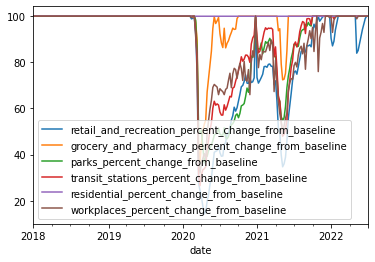

In [10]:
others_df.set_index('date').plot()

## 1.4 Formatting input data into right format

In [11]:
#Creating a dataframe in the format of input to model
data1_in = get_forecast_dates_df(df_dates)

for pairs in stock_list:
    data1_in = pd.merge(data1_in,df[df['pair_comb']==pairs][['Open','Date']].rename(columns={'Open':pairs}).set_index('Date'),
                        left_index=True, 
                        right_index=True,
                        how='left')
data1_in = data1_in.reset_index().rename(columns={'index':'date'})

dates_df = get_forecast_dates_df(df_dates).reset_index().rename(columns= {'index':'date'})
#To interpolate the missing values
for pairs in stock_list:
    data1_in_iter = data1_in.loc[data1_in.index<current_week,:][[pairs,'date']].copy()
    data1_in_iter = data1_in_iter.interpolate(method ='pad', limit_direction ='forward', limit = 2)
    dates_df = pd.merge(dates_df,data1_in_iter, on ='date', how='left')
    
data1_in = dates_df.copy()
del data1_in_iter, dates_df

data1_in['year'] = pd.to_datetime(data1_in['date']).dt.year
data1_in['month'] = pd.to_datetime(data1_in['date']).dt.month
data1_in['quarter'] = pd.to_datetime(data1_in['date']).dt.quarter

In [12]:
data1_in

,date,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,DRREDDY,HCLTECH,HDFC,HDFCBANK,HINDUNILVR,ICICIBANK,INDUSINDBK,INFY,ITC,KOTAKBANK,LT,M&M,MARUTI,NESTLEIND,NTPC,ONGC,POWERGRID,RELIANCE,SBIN,SUNPHARMA,TCS,TECHM,TITAN,ULTRACEMCO,year,month,quarter
0,2018-01-01,1155.300000,562.550000,3291.360010,5146.450000,1740.500000,482.610791,2399.800000,446.925000,1710.510010,932.109998,1347.760010,312.090002,1645.140015,514.949994,262.300000,1002.590002,1278.480005,755.540002,9579.450000,7876.829980,148.416669,196.160001,201.720001,920.190002,307.600000,575.450012,1327.775000,511.600000,862.700000,4304.219922,2018,1,1
1,2018-01-08,1185.780005,563.400012,3272.710010,5195.879980,1808.369995,476.074634,2458.779980,450.420001,1730.659985,932.855005,1361.200000,312.390002,1721.800000,524.690002,268.289996,1007.270007,1328.220020,761.279993,9419.800000,7861.290039,146.700000,198.569998,200.700000,936.379993,304.690002,590.120020,1373.719995,535.809998,919.419995,4418.290039,2018,1,1
2,2018-01-15,1193.960010,572.940002,3195.150000,4996.519922,1719.780005,459.339502,2457.800000,469.859998,1850.989990,951.725000,1376.529980,335.079999,1679.700000,557.440002,268.179999,1037.000000,1340.470020,760.740002,9382.900000,7779.179980,143.666666,196.850000,197.279999,935.240002,303.460004,580.929980,1421.030005,553.109998,904.390002,4488.379980,2018,1,1
3,2018-01-22,1173.500000,609.774994,3281.625000,5010.700073,1721.500000,445.551155,2509.500000,490.500000,1895.024994,980.550003,1355.274994,354.550003,1698.250000,581.887497,276.712502,1073.650024,1396.087524,761.287506,9387.399902,7630.800049,143.937500,205.212502,196.100002,968.850006,316.612495,577.637497,1543.875000,576.037506,902.450012,4322.862427,2018,1,1
4,2018-01-29,1145.300000,597.629993,3352.779980,4910.220020,1699.880005,403.938220,2305.800000,498.790002,1944.869995,995.700000,1379.830005,350.920001,1746.639990,579.550000,275.579999,1109.800000,1435.749976,769.079993,9519.040039,7453.070020,141.633334,202.739999,194.959998,956.620007,311.179993,578.350000,1560.305005,604.350000,870.080005,4371.039941,2018,1,1
5,2018-02-05,1117.770020,562.359998,3162.800000,4875.729980,1626.939990,393.491388,2117.600000,479.100000,1805.910010,944.369995,1326.539990,328.000000,1684.219995,560.430005,273.500000,1047.120020,1353.299976,758.819995,8941.400000,7078.740039,137.016666,188.679999,193.220001,892.929993,293.050006,548.140002,1508.700000,609.569995,791.190002,4096.420020,2018,2,1
6,2018-02-12,1142.875000,551.925003,3159.687500,5180.575073,1660.274994,396.380791,2210.924988,474.925003,1811.774994,938.318756,1350.750000,328.337502,1677.849976,554.637497,269.849998,1048.862518,1349.262512,755.562500,9039.250000,7336.137451,136.635414,189.612499,196.500000,924.037491,283.012497,579.687500,1478.375000,601.750000,811.475006,4190.762573,2018,2,1
7,2018-02-19,1128.310010,534.409998,3038.120020,5013.339941,1626.630005,384.568427,2168.750000,466.150000,1820.069995,934.284998,1335.839990,319.870001,1626.239990,571.709998,265.979999,1061.030005,1299.359985,724.690002,8765.400000,7579.239941,135.941666,186.779999,194.229999,924.530005,271.210004,554.590002,1491.800000,588.289990,818.309998,4144.729980,2018,2,1
8,2018-02-26,1108.950012,537.050003,3023.400024,5096.974976,1652.475006,393.248116,2185.787476,475.099991,1823.937500,946.106262,1327.174988,320.025002,1678.000000,577.574997,266.887497,1091.512512,1326.075012,732.487503,8884.737305,7686.612427,136.145832,189.650002,196.200001,942.612488,271.387497,554.100006,1526.131256,613.949997,822.225006,4144.724976,2018,2,1
9,2018-03-05,1114.560010,520.509998,2945.879980,4966.800000,1643.070020,382.264252,2195.680029,472.100000,1797.750000,930.994995,1301.600000,298.829999,1720.800000,578.275000,260.370001,1094.520020,1290.850000,730.330017,8766.040039,7755.779980,136.258334,184.420001,195.869998,919.500000,257.359995,533.140002,1533.100000,619.580005,813.650000,4124.429980,2018,3,1


# 2. Feature Engineering

In [13]:
final_features_dict = {}

#Defining the features required
lag_variables_target = [1,2,5,8,12]
rolling_mean = [4,8,12]
trend  = [4,8,12]
#Taking lag 5 weeks for other target features because we won't have the actuals
lag_variables_other_target = [5]

## Pass varaibles to be used in the modelling
target = ['Volume','Adj Close','Low','High','Close']
other_target = ['peak_week_flag'] 


for pairs in stock_list:
    dates_df = get_forecast_dates_df(df_dates).reset_index().rename(columns= {'index':'date'})
    final_features_iter  = dates_df.merge(df[df['pair_comb']==pairs].reset_index(drop=True).drop(columns={'Open','Stock','pair_comb'}).rename(columns={'Date':'date'}),on='date',how='left')
    
    ####--------------------------------------####
    
    #To interpolate the missing values
    for feat in set(final_features_iter.columns)-set(['date']):
        final_features_iter_interpolate = final_features_iter.loc[final_features_iter.date<=pd.to_datetime(max_date) - timedelta(days=6),:][[feat,'date']].copy()
        final_features_iter_interpolate = final_features_iter_interpolate.interpolate(method = 'pad', limit_direction ='forward', limit = 2)
        dates_df = pd.merge(dates_df,final_features_iter_interpolate, on ='date', how='left')
        
    final_features_iter = dates_df.copy()
    final_features_iter_new = dates_df.copy()

    #Getting the forecast dates as array
    arr_dates = np.array(list(final_features_iter['date']))
    
    print("----------------------------------------------------------------")
    print("Forecasting done on list of {} variables for the Stocks: {}".format(target,pairs))
    #Forecasting missing values
    for feat in target:
        forecast_duration = forecast_weeks + 4 #(5 weeks + 4 weeks in multiple iteration)
        final_features_iter_copy = final_features_iter.copy()
        final_features_iter_copy = final_features_iter_copy.fillna(0)
        final_features_iter_copy.loc[(final_features_iter_copy['date']>='2020-04-01')&(final_features_iter_copy['date']<='2020-06-07'), feat] = None
        data_prophet = final_features_iter_copy[['date',feat]]
        data_prophet = data_prophet.rename({'date': 'ds', feat: 'y'}, axis='columns')[:-forecast_duration]
        model = Prophet().add_country_holidays(country_name='India')
        model.fit(data_prophet)
        future = df[['Date']].drop_duplicates().reset_index(drop=True).rename(columns={'Date':'ds'})
        forecast = model.predict(future)
        forecast = forecast[['ds','yhat']].rename(columns={'ds':'date','yhat':feat})
        result = pd.concat([data_prophet.set_index('ds')['y'], forecast.set_index('date')[[feat]]], axis=1)
        final_features_iter_new = final_features_iter_new.drop(columns=feat).merge(forecast, on='date',how='left')
    final_features_iter = final_features_iter_new.copy()
    
    final_features = pd.DataFrame()
    for var in target:
        derived_features = create_derived_features(var,final_features_iter,lag_variables_target,rolling_mean,trend)
        final_features = pd.concat([final_features,derived_features], axis=1)
    
    other_final_features = pd.DataFrame()
    for var in other_target:
        other_derived_features = create_derived_features(var,final_features_iter,lag_variables_other_target,rolling_mean = [],trend = [])
        other_final_features = pd.concat([other_final_features,other_derived_features], axis=1)
 
    final_features['date'] = final_features_iter['date']
    other_final_features['date'] = final_features_iter['date']
    final_features_dict[pairs] = pd.merge(final_features,other_final_features.drop(columns=other_target),on='date',how='left')
    final_features_dict[pairs] = pd.merge(final_features_dict[pairs],df_date_features[df_date_features['pair_comb']==pairs].reset_index(drop=True).drop(columns={'pair_comb'}).rename(columns={'Date':'date'}),on='date',how='left')
    final_features_dict[pairs][set(final_features_dict[pairs].columns)].fillna(0,inplace=True)

    del derived_features, final_features_iter, final_features, other_final_features, other_derived_features

  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: ASIANPAINT


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: AXISBANK


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: BAJAJ-AUTO


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: BAJAJFINSV


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: BAJFINANCE


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: BHARTIARTL


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: DRREDDY


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: HCLTECH


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: HDFC


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: HDFCBANK


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: HINDUNILVR


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: ICICIBANK


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: INDUSINDBK


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: INFY


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: ITC


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: KOTAKBANK


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: LT


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: M&M


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: MARUTI


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: NESTLEIND


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: NTPC


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: ONGC


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: POWERGRID


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: RELIANCE


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: SBIN


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: SUNPHARMA


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: TCS


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: TECHM


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: TITAN


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


----------------------------------------------------------------
Forecasting done on list of ['Volume', 'Adj Close', 'Low', 'High', 'Close'] variables for the Stocks: ULTRACEMCO


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
for cols in ['Volume', 'Adj Close', 'Low', 'High', 'Close']:
    Variables_forecast = get_forecast_dates_df(df_dates).reset_index().rename(columns={'index':'date'})
    for pairs in stock_list:
        Variables_forecast = Variables_forecast.merge(final_features_dict[pairs][['date',cols]], on='date', how='left').rename(columns={cols:pairs})
    file_name = 'Variables_forecast_latest_'+cols+'.xlsx'
    Variables_forecast.to_excel(output_path/file_name,index=False)
    del Variables_forecast

In [15]:
data1_in_copy = data1_in.copy()
data1_in_original = data1_in.copy()

# 3. Modeling

## 3.1. FB Prophet

In [16]:
result_dict = {}
for pairs in stock_list:
    print("Process completed for: ",pairs)
    forecast_duration = forecast_weeks + 4 #(5 weeks + 4 weeks in multiple iteration)
    data1_in_copy.loc[(data1_in_copy['date']>='2020-04-01')&(data1_in_copy['date']<='2020-06-07'), pairs] = None
    data_prophet = data1_in_copy[['date',pairs]].copy()
    data_prophet = data_prophet.rename({'date': 'ds', pairs: 'y'}, axis='columns')[:-forecast_duration]
    
    model = Prophet().add_country_holidays(country_name='India')
    model.fit(data_prophet)
    future = df[['Date']].drop_duplicates().reset_index(drop=True).rename(columns={'Date':'ds'})
    forecast = model.predict(future)
    result_dict[pairs] = forecast[['ds','yhat']].rename(columns={'ds':'date','yhat':'fb_forecast_original'})
    
    #####NOTE: Filling outliers with treated values
    data1_in.loc[(data1_in['date']>='2020-04-01')&(data1_in['date']<='2020-06-07'), pairs] = result_dict[pairs].loc[(result_dict[pairs]['date']>='2020-04-01')&(result_dict[pairs]['date']<='2020-06-07'), 'fb_forecast_original']
    data1_in.loc[(data1_in['date']>='2020-04-01')&(data1_in['date']<='2020-06-07'), pairs] = round(data1_in.loc[(data1_in['date']>='2020-04-01')&(data1_in['date']<='2020-06-07'), pairs],0)
    data1_in.loc[(data1_in[pairs]<0), pairs] = data1_in_original.loc[(data1_in[pairs]<0), pairs]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  ASIANPAINT


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  AXISBANK


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  BAJAJ-AUTO


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  BAJAJFINSV


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  BAJFINANCE


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  BHARTIARTL


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  DRREDDY


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  HCLTECH


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  HDFC


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  HDFCBANK


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  HINDUNILVR


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  ICICIBANK


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  INDUSINDBK


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  INFY


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  ITC


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  KOTAKBANK


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  LT


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  M&M


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  MARUTI


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  NESTLEIND


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  NTPC


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  ONGC


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  POWERGRID


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  RELIANCE


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  SBIN


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  SUNPHARMA


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  TCS


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  TECHM


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  TITAN


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Process completed for:  ULTRACEMCO


In [17]:
# results_fb_prophet = pd.DataFrame(columns = {'date','Predicted_fb','pair_comb','fb_forecast_original'})
results_fb_prophet = pd.DataFrame(columns = {'date','pair_comb','fb_forecast_original'})
for pairs in stock_list:
    result_dict[pairs]['pair_comb'] = pairs
    results_fb_prophet = pd.concat([results_fb_prophet,result_dict[pairs]],axis=0)

results_fb_prophet.to_excel(output_path/'results_fb_prophet_diff_timeframe_latest.xlsx',index=False)
results_fb_prophet

,date,pair_comb,fb_forecast_original
0,2018-01-01,ASIANPAINT,1142.980855
1,2018-01-08,ASIANPAINT,1341.439732
2,2018-01-15,ASIANPAINT,1291.971466
3,2018-01-22,ASIANPAINT,1238.979351
4,2018-01-29,ASIANPAINT,1207.902631
...,...,...,...
231,2022-06-06,ULTRACEMCO,7182.067700
232,2022-06-13,ULTRACEMCO,7139.614189
233,2022-06-20,ULTRACEMCO,7131.119402
234,2022-06-27,ULTRACEMCO,7147.282572


## 3.2. Univariate models

In [18]:
from statsmodels.tsa.forecasting.theta import ThetaModel

forecast_duration = forecast_weeks + 4 #(5 weeks + 4 weeks in multiple iteration)

df_theta = data1_in.drop(columns={'year','month','quarter'}).copy()

df_theta_forecast_dict = {}
df_theta_forecast = df_theta['date']

for pairs in stock_list:
    print("Process completed for: ",pairs)
    df = data1_in[(data1_in[pairs]>0.0001)][['date',pairs]].copy()
    df = df.rename({'date': 'ds', pairs: 'y'}, axis='columns')
    

    tm = ThetaModel(df.y, period = forecast_duration)
    model = tm.fit()
    print(model.summary())
    fcast = model.forecast(forecast_duration)
    df_theta_forecast_dict[pairs] = pd.concat([df.y,fcast],axis=0) 
    df_theta_forecast_dict[pairs] = pd.DataFrame(df_theta_forecast_dict[pairs]).rename(columns = {0:pairs})
    df_theta_forecast_dict[pairs]['date'] = df_theta['date']
    df_theta_forecast = pd.merge(df_theta_forecast,df_theta_forecast_dict[pairs],on='date',how='left')
    
df_theta = df_theta_forecast.fillna(0).copy() 
    
    
    


Process completed for:  ASIANPAINT
                              ThetaModel Results                              
Dep. Variable:                      y   No. Observations:                  227
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Thu, 23 Jun 2022   Deseas. Method:         Multiplicative
Time:                        04:11:17   Period:                              9
Sample:                             0                                         
                                  227                                         
  Parameter Estimates   
          Parameters    
------------------------
b0     10.39996814327283
alpha 0.9998685545683967
------------------------
Process completed for:  AXISBANK
                              ThetaModel Results                              
Dep. Variable:                      y   No. Observations:                  227
Method:                       OLS/SES   Deseasonalized:                

------------------------
Process completed for:  HINDUNILVR
                              ThetaModel Results                              
Dep. Variable:                      y   No. Observations:                  227
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Thu, 23 Jun 2022   Deseas. Method:         Multiplicative
Time:                        04:11:18   Period:                              9
Sample:                             0                                         
                                  227                                         
  Parameter Estimates   
          Parameters    
------------------------
b0    4.7186583932617525
alpha 0.9998587470467749
------------------------
Process completed for:  ICICIBANK
                              ThetaModel Results                              
Dep. Variable:                      y   No. Observations:                  227
Method:                       OLS/SES   Desea

------------------------
Process completed for:  TCS
                              ThetaModel Results                              
Dep. Variable:                      y   No. Observations:                  227
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Thu, 23 Jun 2022   Deseas. Method:         Multiplicative
Time:                        04:11:18   Period:                              9
Sample:                             0                                         
                                  227                                         
  Parameter Estimates   
          Parameters    
------------------------
b0     9.955063742767043
alpha 0.9998726350152921
------------------------
Process completed for:  TECHM
                              ThetaModel Results                              
Dep. Variable:                      y   No. Observations:                  227
Method:                       OLS/SES   Deseasonalized: 

In [19]:
df_theta

,date,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,DRREDDY,HCLTECH,HDFC,HDFCBANK,HINDUNILVR,ICICIBANK,INDUSINDBK,INFY,ITC,KOTAKBANK,LT,M&M,MARUTI,NESTLEIND,NTPC,ONGC,POWERGRID,RELIANCE,SBIN,SUNPHARMA,TCS,TECHM,TITAN,ULTRACEMCO
0,2018-01-01,1155.300000,562.550000,3291.360010,5146.450000,1740.500000,482.610791,2399.800000,446.925000,1710.510010,932.109998,1347.760010,312.090002,1645.140015,514.949994,262.300000,1002.590002,1278.480005,755.540002,9579.450000,7876.829980,148.416669,196.160001,201.720001,920.190002,307.600000,575.450012,1327.775000,511.600000,862.700000,4304.219922
1,2018-01-08,1185.780005,563.400012,3272.710010,5195.879980,1808.369995,476.074634,2458.779980,450.420001,1730.659985,932.855005,1361.200000,312.390002,1721.800000,524.690002,268.289996,1007.270007,1328.220020,761.279993,9419.800000,7861.290039,146.700000,198.569998,200.700000,936.379993,304.690002,590.120020,1373.719995,535.809998,919.419995,4418.290039
2,2018-01-15,1193.960010,572.940002,3195.150000,4996.519922,1719.780005,459.339502,2457.800000,469.859998,1850.989990,951.725000,1376.529980,335.079999,1679.700000,557.440002,268.179999,1037.000000,1340.470020,760.740002,9382.900000,7779.179980,143.666666,196.850000,197.279999,935.240002,303.460004,580.929980,1421.030005,553.109998,904.390002,4488.379980
3,2018-01-22,1173.500000,609.774994,3281.625000,5010.700073,1721.500000,445.551155,2509.500000,490.500000,1895.024994,980.550003,1355.274994,354.550003,1698.250000,581.887497,276.712502,1073.650024,1396.087524,761.287506,9387.399902,7630.800049,143.937500,205.212502,196.100002,968.850006,316.612495,577.637497,1543.875000,576.037506,902.450012,4322.862427
4,2018-01-29,1145.300000,597.629993,3352.779980,4910.220020,1699.880005,403.938220,2305.800000,498.790002,1944.869995,995.700000,1379.830005,350.920001,1746.639990,579.550000,275.579999,1109.800000,1435.749976,769.079993,9519.040039,7453.070020,141.633334,202.739999,194.959998,956.620007,311.179993,578.350000,1560.305005,604.350000,870.080005,4371.039941
5,2018-02-05,1117.770020,562.359998,3162.800000,4875.729980,1626.939990,393.491388,2117.600000,479.100000,1805.910010,944.369995,1326.539990,328.000000,1684.219995,560.430005,273.500000,1047.120020,1353.299976,758.819995,8941.400000,7078.740039,137.016666,188.679999,193.220001,892.929993,293.050006,548.140002,1508.700000,609.569995,791.190002,4096.420020
6,2018-02-12,1142.875000,551.925003,3159.687500,5180.575073,1660.274994,396.380791,2210.924988,474.925003,1811.774994,938.318756,1350.750000,328.337502,1677.849976,554.637497,269.849998,1048.862518,1349.262512,755.562500,9039.250000,7336.137451,136.635414,189.612499,196.500000,924.037491,283.012497,579.687500,1478.375000,601.750000,811.475006,4190.762573
7,2018-02-19,1128.310010,534.409998,3038.120020,5013.339941,1626.630005,384.568427,2168.750000,466.150000,1820.069995,934.284998,1335.839990,319.870001,1626.239990,571.709998,265.979999,1061.030005,1299.359985,724.690002,8765.400000,7579.239941,135.941666,186.779999,194.229999,924.530005,271.210004,554.590002,1491.800000,588.289990,818.309998,4144.729980
8,2018-02-26,1108.950012,537.050003,3023.400024,5096.974976,1652.475006,393.248116,2185.787476,475.099991,1823.937500,946.106262,1327.174988,320.025002,1678.000000,577.574997,266.887497,1091.512512,1326.075012,732.487503,8884.737305,7686.612427,136.145832,189.650002,196.200001,942.612488,271.387497,554.100006,1526.131256,613.949997,822.225006,4144.724976
9,2018-03-05,1114.560010,520.509998,2945.879980,4966.800000,1643.070020,382.264252,2195.680029,472.100000,1797.750000,930.994995,1301.600000,298.829999,1720.800000,578.275000,260.370001,1094.520020,1290.850000,730.330017,8766.040039,7755.779980,136.258334,184.420001,195.869998,919.500000,257.359995,533.140002,1533.100000,619.580005,813.650000,4124.429980


In [20]:
forecast_duration = forecast_weeks + 4 #(5 weeks + 4 weeks in multiple iteration)

df_exp_smooth = data1_in.drop(columns={'year','month','quarter'}).copy()

df_exp_smooth_forecast = df_exp_smooth['date']
def simple_exp_smooth(d,extra_periods=1,alpha=0.4):  
    d = np.array(d)  # Transform the input into a numpy array  
    cols = len(d)  # Historical period length  
    d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  
    f = np.full(cols+extra_periods,np.nan)  # Forecast array  
    f[1] = d[0]  # initialization of first forecast  
    # Create all the t+1 forecasts until end of historical period  
    for t in range(2,cols+1):  
        f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
    f[cols+1:] = f[t]  # Forecast for all extra periods  
    df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Error":d-f})
    return df
for pairs in stock_list:
    
    d=df_exp_smooth[pairs][:-forecast_duration].tolist()
    df = simple_exp_smooth(d,extra_periods=forecast_duration)
    df['date'] = df_exp_smooth['date']
    df_exp_smooth_forecast = pd.merge(df_exp_smooth_forecast,df[['date','Forecast']].rename(columns={'Forecast':pairs}),on='date',how='left')
    
df_exp_smooth = df_exp_smooth_forecast.fillna(0).copy() 

In [21]:
df_exp_smooth

,date,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,DRREDDY,HCLTECH,HDFC,HDFCBANK,HINDUNILVR,ICICIBANK,INDUSINDBK,INFY,ITC,KOTAKBANK,LT,M&M,MARUTI,NESTLEIND,NTPC,ONGC,POWERGRID,RELIANCE,SBIN,SUNPHARMA,TCS,TECHM,TITAN,ULTRACEMCO
0,2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-01-08,1155.300000,562.550000,3291.360010,5146.450000,1740.500000,482.610791,2399.800000,446.925000,1710.510010,932.109998,1347.760010,312.090002,1645.140015,514.949994,262.300000,1002.590002,1278.480005,755.540002,9579.450000,7876.829980,148.416669,196.160001,201.720001,920.190002,307.600000,575.450012,1327.775000,511.600000,862.700000,4304.219922
2,2018-01-15,1167.492002,562.890005,3283.900010,5166.221992,1767.647998,479.996328,2423.391992,448.323000,1718.570000,932.408000,1353.136006,312.210002,1675.804009,518.845997,264.695999,1004.462004,1298.376011,757.835999,9515.590000,7870.614004,147.730001,197.124000,201.312001,926.665999,306.436001,581.318015,1346.152998,521.283999,885.387998,4349.847969
3,2018-01-22,1178.079205,566.910004,3248.400006,5098.341164,1748.500801,471.733598,2437.155195,456.937799,1771.537996,940.134800,1362.493596,321.358001,1677.362405,534.283599,266.089599,1017.477203,1315.213614,758.997600,9462.514000,7834.040395,146.104667,197.014400,199.699200,930.095600,305.245602,581.162801,1376.103801,534.014398,892.988800,4405.260773
4,2018-01-29,1176.247523,584.056000,3261.690004,5063.284728,1737.700480,461.260621,2466.093117,470.362680,1820.932795,956.300881,1359.606155,334.634802,1685.717443,553.325158,270.338760,1039.946331,1347.563178,759.913562,9432.468361,7752.744256,145.237800,200.293640,198.259521,945.597362,309.792359,579.752680,1443.212280,550.823642,896.773285,4372.301435
5,2018-02-05,1163.868514,589.485597,3298.125994,5002.058844,1722.572290,438.331660,2401.975870,481.733609,1870.507675,972.060529,1367.695695,341.148882,1710.086462,563.815095,272.435255,1067.887799,1382.837897,763.580135,9467.097032,7632.874562,143.796014,201.272184,196.939712,950.006420,310.347413,579.191608,1490.049370,572.234185,886.095973,4371.796837
6,2018-02-12,1145.429116,578.635357,3243.995597,4951.527299,1684.319370,420.395551,2288.225522,480.680165,1844.668609,960.984315,1351.233413,335.889329,1699.739875,562.461059,272.861153,1059.580687,1371.022729,761.676079,9256.818219,7411.220753,141.084275,196.235310,195.451827,927.175849,303.428450,566.770966,1497.509622,587.168509,848.133585,4261.646110
7,2018-02-19,1144.407470,567.951216,3210.272358,5043.146409,1674.701620,410.789647,2257.305308,478.378100,1831.511163,951.918092,1351.040048,332.868598,1690.983915,559.331634,271.656691,1055.293420,1362.318642,759.230647,9169.790932,7381.187432,139.304730,193.586186,195.871096,925.920506,295.262069,571.937579,1489.855773,593.001105,833.470153,4233.292695
8,2018-02-26,1137.968486,554.534728,3141.411423,5031.223822,1655.472974,400.301159,2221.883185,473.486860,1826.934696,944.864854,1344.960025,327.669159,1665.086345,564.282980,269.386014,1057.588054,1337.135179,745.414389,9008.034559,7460.408436,137.959504,190.863711,195.214657,925.364306,285.641243,564.998549,1490.633464,591.116659,827.406091,4197.867609
9,2018-03-05,1126.361096,547.540838,3094.206863,5057.524283,1654.273787,397.479942,2207.444901,474.132112,1825.735817,945.361417,1337.846010,324.611496,1670.251807,569.599786,268.386607,1071.157837,1332.711112,740.243635,8958.715657,7550.890032,137.234036,190.378227,195.608795,932.263578,279.939744,560.639132,1504.832581,600.249994,825.333657,4176.610556


In [22]:
#Same period last year
forecast_duration = forecast_weeks + 4 #(5 weeks + 4 weeks in multiple iteration)
df_last_year = pd.DataFrame(data1_in.date.unique()).rename(columns={0:'date'})
for pairs in stock_list:
    print("Process completed for (Same period last year): ",pairs)
    df = data1_in[['date',pairs]].copy(); df.fillna(0,inplace=True)
    for i in range(forecast_duration):
        last_year_dates = pd.DataFrame(data1_in.date.unique()).rename(columns={0:'date'})
        last_year_dates = list((last_year_dates[(last_year_dates['date']>=data1_in[:-forecast_duration+i].date.max()-timedelta(days=365))&(last_year_dates['date']<=data1_in[:-forecast_duration+i].date.max()+timedelta(days=14)-timedelta(days=365))]).date.unique())
        df.loc[df['date']==data1_in[:-forecast_duration+i].date.max()+timedelta(days=7),pairs] = (df.loc[df['date']==pd.DataFrame(last_year_dates).min().iloc[0],pairs].iloc[0] + df.loc[df['date']==pd.DataFrame(last_year_dates).max().iloc[0],pairs].iloc[0])/2
    df_last_year = pd.merge(df_last_year,df,on='date',how='left')
    
#Same weeks of last 4 months 
forecast_duration = forecast_weeks + 4 #(5 weeks + 4 weeks in multiple iteration)
df_last_4_months = pd.DataFrame(data1_in.date.unique()).rename(columns={0:'date'})
for pairs in stock_list:
    print("Process completed for (Same weeks of last 4 months): ",pairs)
    df = data1_in[['date',pairs]].copy(); df.fillna(0,inplace=True)
    for i in range(forecast_duration):
        last_4_months_dates = pd.DataFrame(data1_in.date.unique()).rename(columns={0:'date'})
        for months_iter in range(4):
            if (months_iter==0):
                last_4_months_dates_final = list((last_4_months_dates[(last_4_months_dates['date']>=data1_in[:-forecast_duration+i].date.max()-timedelta(days=30))&(last_4_months_dates['date']<=data1_in[:-forecast_duration+i].date.max()+timedelta(days=14)-timedelta(days=30))]).date.unique())
            else:
                last_4_months_dates_final = last_4_months_dates_final+list((last_4_months_dates[(last_4_months_dates['date']>=data1_in[:-forecast_duration+i].date.max()-timedelta(days=30+i*30))&(last_4_months_dates['date']<=data1_in[:-forecast_duration+i].date.max()+timedelta(days=14)-timedelta(days=30+i*30))]).date.unique())
        df.loc[df['date']==data1_in[:-forecast_duration+i].date.max()+timedelta(days=7),pairs] = (df.loc[df['date']==pd.DataFrame(last_4_months_dates_final).iloc[0,0],pairs].iloc[0]+df.loc[df['date']==pd.DataFrame(last_4_months_dates_final).iloc[1,0],pairs].iloc[0]+df.loc[df['date']==pd.DataFrame(last_4_months_dates_final).iloc[2,0],pairs].iloc[0]+df.loc[df['date']==pd.DataFrame(last_4_months_dates_final).iloc[3,0],pairs].iloc[0]+df.loc[df['date']==pd.DataFrame(last_4_months_dates_final).iloc[4,0],pairs].iloc[0]+df.loc[df['date']==pd.DataFrame(last_4_months_dates_final).iloc[5,0],pairs].iloc[0]+df.loc[df['date']==pd.DataFrame(last_4_months_dates_final).iloc[6,0],pairs].iloc[0]+df.loc[df['date']==pd.DataFrame(last_4_months_dates_final).iloc[7,0],pairs].iloc[0])/8
    df_last_4_months = pd.merge(df_last_4_months,df,on='date',how='left')
    
df_time_based = df_last_4_months.copy()
for pairs in stock_list:
    df_time_based[pairs] = (df_time_based[pairs] + df_last_year[pairs])/2

Process completed for (Same period last year):  ASIANPAINT
Process completed for (Same period last year):  AXISBANK
Process completed for (Same period last year):  BAJAJ-AUTO
Process completed for (Same period last year):  BAJAJFINSV
Process completed for (Same period last year):  BAJFINANCE
Process completed for (Same period last year):  BHARTIARTL
Process completed for (Same period last year):  DRREDDY
Process completed for (Same period last year):  HCLTECH
Process completed for (Same period last year):  HDFC
Process completed for (Same period last year):  HDFCBANK
Process completed for (Same period last year):  HINDUNILVR
Process completed for (Same period last year):  ICICIBANK
Process completed for (Same period last year):  INDUSINDBK
Process completed for (Same period last year):  INFY
Process completed for (Same period last year):  ITC
Process completed for (Same period last year):  KOTAKBANK
Process completed for (Same period last year):  LT
Process completed for (Same period l

In [23]:
#Merging all the univariate models 
results_exp_smooth = pd.DataFrame(columns = {'date','pair_comb','exp_smooth'})
results_theta = pd.DataFrame(columns = {'date','pair_comb','theta'})
results_time_based = pd.DataFrame(columns = {'date','pair_comb','time_based'})
for pairs in stock_list:
    
    df_iter = df_exp_smooth[['date',pairs]].rename(columns={pairs:'exp_smooth'}).copy(); df_iter['pair_comb'] = pairs
    results_exp_smooth = pd.concat([results_exp_smooth,df_iter],axis=0)
    
    df_iter = df_theta[['date',pairs]].rename(columns={pairs:'theta'}).copy(); df_iter['pair_comb'] = pairs
    results_theta = pd.concat([results_theta,df_iter],axis=0)
 
    df_iter = df_time_based[['date',pairs]].rename(columns={pairs:'time_based'}).copy(); df_iter['pair_comb'] = pairs
    results_time_based = pd.concat([results_time_based,df_iter],axis=0)

results_advanced_univariate = results_exp_smooth.merge(results_theta,on=['date','pair_comb'],how='left')
results_advanced_univariate = results_advanced_univariate.merge(results_time_based,on=['date','pair_comb'],how='left')
del results_exp_smooth, results_theta, results_time_based
        
results_advanced_univariate.to_excel(output_path/'results_advanced_univariate_diff_timeframe_latest.xlsx',index=False)
results_advanced_univariate

,exp_smooth,date,pair_comb,theta,time_based
0,0.000000,2018-01-01,ASIANPAINT,1155.300000,1155.300000
1,1155.300000,2018-01-08,ASIANPAINT,1185.780005,1185.780005
2,1167.492002,2018-01-15,ASIANPAINT,1193.960010,1193.960010
3,1178.079205,2018-01-22,ASIANPAINT,1173.500000,1173.500000
4,1176.247523,2018-01-29,ASIANPAINT,1145.300000,1145.300000
...,...,...,...,...,...
7075,6607.825758,2022-06-06,ULTRACEMCO,6544.782716,7056.375636
7076,6607.825758,2022-06-13,ULTRACEMCO,6559.377309,6949.750465
7077,6607.825758,2022-06-20,ULTRACEMCO,6601.534180,7064.452173
7078,6607.825758,2022-06-27,ULTRACEMCO,6613.485746,7103.598994


## 3.3. Pipeline models

In [24]:
error_pairs = [] #(If less than 30 weeks then storing in "error_pairs" list)
forecast_results_ensemble_average = get_forecast_dates_df(df_dates).reset_index().rename(columns= {'index':'date'})
forecast_results_best_model = get_forecast_dates_df(df_dates).reset_index().rename(columns= {'index':'date'})

for pairs in stock_list:
    
    final_features = final_features_dict[pairs].fillna(0).copy()

    initial_features = {
                       pairs:[]
                       }


    drop_features = {  
                    pairs:[]      
                    }

    forecast_tag = 'diff_timeframe_latest_' + str(forecast_weeks) + "_weeks_" + pairs

    ###----------------------------------------------------------###
    #Checking if data has minimum 30 weeks for forecasting
    data_check = data1_in.loc[:,['date',pairs]]
    #Removing zero Stock value cases during forecasting 
    data_check = data_check[(data_check[pairs]>0.0001)].reset_index(drop=True)
    #Number of weeks in training period remaining (Maintaining minimum of 30 weeks)
    weeks_diff = len(list(data_check['date'].sort_values()))
    ###----------------------------------------------------------### 
    
    if (weeks_diff>=30):       
        #Resetting the training start from non-NaN values
        train_val_params_list = get_train_val_params_final_iter(data_check.sort_values(by='date'),train_val_params_list,N_RUNS,train_decrease_window)
        
        #Change "is_rfe_exec" & "shap_feature_selection" based on the needs
        ##Default features can be used for running models by keeping both false 
        rec_main = partial(process,data1_in.fillna(0),final_features.fillna(0),base_features=[],
                           model_params = model_params,error_weights = error_weights, others_data=others_df,
                           is_rfe_exec=False,
                           shap_feature_selection=True,
                           top_k_features=7)

        #Running processes for all the accounts
        rec_output_dict, select_features, forecast_all, error_analysis_timeframe, error_analysis = recursive_modeling(rec_main,forecast_tag,output_path,forecast_all_output_filename,initial_features,drop_features,train_val_params_list)

        #Saving the results
        for train_val_params_id in train_val_params_list:
            rec_output_df = dict(sorted(rec_output_dict[train_val_params_id['test_start']].items()))
            forecast_all_df = dict(sorted(forecast_all[train_val_params_id['test_start']].items()))
            #Getting the best models and saving them
            if(train_val_params_id == train_val_params_list[0]):
                forecast_results_ensemble_average = forecast_results_ensemble_average.merge(forecast_all_df[pairs].reset_index()[['date','ensemble_avg']].rename(columns= {'ensemble_avg':pairs}),on='date',how='left')
                forecast_results_best_model = forecast_results_best_model.merge(forecast_all_df[pairs].reset_index()[['date',forecast_all_df[pairs].reset_index().columns[2]]].rename(columns= {forecast_all_df[pairs].reset_index().columns[2]:pairs}),on='date',how='left')
            else:
                if str(forecast_all_df[pairs].reset_index().loc[forecast_all_df[pairs].reset_index()['date']==pd.to_datetime(train_val_params_id['test_start']),'ensemble_avg'])[:9] == 'Series([]':
                    forecast_results_ensemble_average.loc[forecast_results_ensemble_average['date']==train_val_params_id['test_start'],pairs] = 0.0
                else:
                    forecast_results_ensemble_average.loc[forecast_results_ensemble_average['date']==train_val_params_id['test_start'],pairs] = float(forecast_all_df[pairs].reset_index().loc[forecast_all_df[pairs].reset_index()['date']==pd.to_datetime(train_val_params_id['test_start']),'ensemble_avg'])
                if str(forecast_all_df[pairs].reset_index().loc[forecast_all_df[pairs].reset_index()['date']==pd.to_datetime(train_val_params_id['test_start']),forecast_all_df[pairs].columns[2]])[:9] == 'Series([]':
                    forecast_results_best_model.loc[forecast_results_best_model['date']==train_val_params_id['test_start'],pairs] = 0.0
                else:
                    forecast_results_best_model.loc[forecast_results_best_model['date']==train_val_params_id['test_start'],pairs] = float(forecast_all_df[pairs].reset_index().loc[forecast_all_df[pairs].reset_index()['date']==pd.to_datetime(train_val_params_id['test_start']),forecast_all_df[pairs].columns[2]])
            forecast_results_ensemble_average.to_excel(output_path/'forecast_results_ensemble_average_diff_timeframe_latest.xlsx',index=False)
            forecast_results_best_model.to_excel(output_path/'forecast_results_best_model_diff_timeframe_latest.xlsx',index=False)
    else:
        error_pairs.append(pairs)
        
print("List of pairs which don't have 30 weeks of data to model are :",error_pairs)    

Starting process for  ASIANPAINT 


Features in ranked order are: ['target_lag_1_Week', 'target_normalized_slope_4', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'Close_normalized_slope_12', 'Close_normalized_slope_8', 'Low_normalized_slope_4', 'Volume_normalized_slope_12', 'Volume_normalized_slope_8', 'Volume_normalized_slope_4', 'Volume_Rolling_12_week_mean', 'Volume_Rolling_8_week_mean', 'Volume_Rolling_4_week_mean', 'Volume_lag_12_Week', 'Volume_lag_8_Week', 'Volume_lag_5_Week', 'Volume_lag_1_Week', 'Volume', 'target_normalized_slope_8', 'workplaces_percent_change_from_baseline']

Final top features remaining after Shapley feature selection are: ['target_lag_1_Week', 'peak_week_flag']

Train Paramters are {'train_start': '2018-01-08', 'train_end': Timestamp('2022-03-28 00:00:00'), 'val_start': Timestamp('2022-04-04 00:00:00'), 'val_end': Timestamp('2022-05-02 00:00:00'), 'test_start': Timestamp('2022-06-06 00:00:00'), 'test_end': Timestamp('2022-07-04 

Training with 5 weeks hold out summary: {'ada': {'train': 3.32, 'val': 2.66}, 'rf': {'train': 1.69, 'val': 3.29}, 'gcv_xgb': {'train': 0.91, 'val': 3.36}, 'ridge': {'train': 2.14, 'val': 3.69}} 

Full Training summary: {'gcv_xgb': {'train': 0.95}, 'rf': {'train': 1.71}, 'ridge': {'train': 2.17}, 'ada': {'train': 3.31}} 

Train summary based on weighted errors {'gcv_xgb': 2.62, 'rf': 2.81, 'ada': 2.86, 'ridge': 3.22}
Train summary based on weighted errors {'gcv_xgb': 2.62, 'rf': 2.81, 'ada': 2.86, 'ridge': 3.22}

Training and inference process completed for  ASIANPAINT 

Starting process for  AXISBANK 


Features in ranked order are: ['target_lag_1_Week', 'target_Rolling_8_week_mean', 'parks_percent_change_from_baseline', 'Adj Close_lag_2_Week', 'Adj Close_lag_1_Week', 'Volume_normalized_slope_4', 'target_lag_12_Week', 'Adj Close_Rolling_8_week_mean', 'target_normalized_slope_4', 'Adj Close_lag_5_Week', 'Volume_lag_8_Week', 'Volume', 'peak_week_flag', 'Week_of_month', 'year_y', 'week', 

Training with 5 weeks hold out summary: {'ada': {'train': 2.9, 'val': 2.21}, 'rf': {'train': 2.19, 'val': 2.69}, 'gcv_xgb': {'train': 2.58, 'val': 2.92}, 'ridge': {'train': 3.45, 'val': 3.35}} 

Full Training summary: {'rf': {'train': 2.2}, 'gcv_xgb': {'train': 2.48}, 'ada': {'train': 2.73}, 'ridge': {'train': 3.45}} 

Train summary based on weighted errors {'ada': 2.42, 'rf': 2.54, 'gcv_xgb': 2.82, 'ridge': 3.38}
Train summary based on weighted errors {'ada': 2.42, 'rf': 2.54, 'gcv_xgb': 2.82, 'ridge': 3.38}

Training and inference process completed for  AXISBANK 

Starting process for  AXISBANK 


Features in ranked order are: ['target_lag_1_Week', 'target_Rolling_8_week_mean', 'parks_percent_change_from_baseline', 'Adj Close_lag_2_Week', 'Adj Close_lag_1_Week', 'Volume_normalized_slope_4', 'target_lag_12_Week', 'Adj Close_Rolling_8_week_mean', 'target_normalized_slope_4', 'Adj Close_lag_5_Week', 'Volume_lag_8_Week', 'Volume', 'peak_week_flag', 'Week_of_month', 'year_y', 'week', 'pea


Features in ranked order are: ['target_lag_1_Week', 'Adj Close_Rolling_12_week_mean', 'Low', 'target_normalized_slope_4', 'Volume_lag_1_Week', 'High_normalized_slope_8', 'Volume_normalized_slope_8', 'peak_week_flag', 'Week_of_month', 'week', 'peak_week_flag_lag_5_Week', 'Close_normalized_slope_12', 'Close_normalized_slope_4', 'Volume_normalized_slope_12', 'Volume_Rolling_12_week_mean', 'Volume_normalized_slope_4', 'target_Rolling_4_week_mean', 'Volume_Rolling_8_week_mean', 'Volume_Rolling_4_week_mean', 'Volume_lag_12_Week', 'Volume_lag_8_Week', 'Volume_lag_5_Week', 'Volume_lag_2_Week', 'Volume', 'target_normalized_slope_8', 'target_Rolling_8_week_mean', 'workplaces_percent_change_from_baseline']

Final top features remaining after Shapley feature selection are: ['target_lag_1_Week', 'Adj Close_Rolling_12_week_mean', 'Low', 'peak_week_flag']

Train Paramters are {'train_start': '2018-03-26', 'train_end': Timestamp('2022-03-07 00:00:00'), 'val_start': Timestamp('2022-03-14 00:00:00'), '

Cross validation summary: {'ridge': {'mean': 4.0, 'stdev': 2.06}, 'rf': {'mean': 12.44, 'stdev': 11.0}, 'gcv_xgb': {'mean': 13.97, 'stdev': 10.61}, 'ada': {'mean': 14.24, 'stdev': 10.18}} 

Training with 5 weeks hold out summary: {'ada': {'train': 4.35, 'val': 2.44}, 'ridge': {'train': 3.44, 'val': 2.68}, 'gcv_xgb': {'train': 1.92, 'val': 2.82}, 'rf': {'train': 2.54, 'val': 2.98}} 

Full Training summary: {'gcv_xgb': {'train': 1.84}, 'rf': {'train': 2.54}, 'ridge': {'train': 3.43}, 'ada': {'train': 4.28}} 

Train summary based on weighted errors {'gcv_xgb': 2.55, 'rf': 2.85, 'ridge': 2.91, 'ada': 3.01}
Train summary based on weighted errors {'gcv_xgb': 2.55, 'rf': 2.85, 'ridge': 2.91, 'ada': 3.01}

Training and inference process completed for  BAJAJFINSV 

Starting process for  BAJAJFINSV 


Features in ranked order are: ['target_lag_1_Week', 'month_all', 'parks_percent_change_from_baseline', 'Volume_lag_12_Week', 'target_normalized_slope_4', 'Close_normalized_slope_8', 'Volume_Rolling

Cross validation summary: {'ridge': {'mean': 3.68, 'stdev': 1.46}, 'ada': {'mean': 16.27, 'stdev': 11.6}, 'rf': {'mean': 16.51, 'stdev': 12.97}, 'gcv_xgb': {'mean': 19.35, 'stdev': 15.28}} 

Training with 5 weeks hold out summary: {'ridge': {'train': 3.64, 'val': 2.18}, 'ada': {'train': 4.99, 'val': 3.14}, 'rf': {'train': 3.04, 'val': 3.49}, 'gcv_xgb': {'train': 4.55, 'val': 3.78}} 

Full Training summary: {'rf': {'train': 3.02}, 'ridge': {'train': 3.6}, 'gcv_xgb': {'train': 4.35}, 'ada': {'train': 4.96}} 

Train summary based on weighted errors {'ridge': 2.62, 'rf': 3.36, 'ada': 3.7, 'gcv_xgb': 4.01}
Train summary based on weighted errors {'ridge': 2.62, 'rf': 3.36, 'ada': 3.7, 'gcv_xgb': 4.01}

Training and inference process completed for  BAJFINANCE 

Starting process for  BAJFINANCE 


Features in ranked order are: ['target_lag_1_Week', 'Volume_Rolling_12_week_mean', 'target_normalized_slope_4', 'Volume_normalized_slope_8', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_f

Cross validation summary: {'ridge': {'mean': 2.88, 'stdev': 0.52}, 'gcv_xgb': {'mean': 5.53, 'stdev': 3.45}, 'rf': {'mean': 5.58, 'stdev': 3.5}, 'ada': {'mean': 6.67, 'stdev': 3.57}} 

Training with 5 weeks hold out summary: {'ridge': {'train': 2.72, 'val': 2.6}, 'rf': {'train': 2.04, 'val': 2.92}, 'gcv_xgb': {'train': 1.86, 'val': 3.3}, 'ada': {'train': 3.0, 'val': 4.36}} 

Full Training summary: {'gcv_xgb': {'train': 1.9}, 'rf': {'train': 2.04}, 'ridge': {'train': 2.71}, 'ada': {'train': 2.99}} 

Train summary based on weighted errors {'ridge': 2.64, 'rf': 2.66, 'gcv_xgb': 2.87, 'ada': 3.95}
Train summary based on weighted errors {'ridge': 2.64, 'rf': 2.66, 'gcv_xgb': 2.87, 'ada': 3.95}

Training and inference process completed for  BHARTIARTL 

Starting process for  BHARTIARTL 


Features in ranked order are: ['target_lag_1_Week', 'Volume_Rolling_12_week_mean', 'target_normalized_slope_8', 'Volume_normalized_slope_8', 'peak_week_flag', 'Week_of_month', 'week', 'peak_week_flag_lag_5_

Cross validation summary: {'ridge': {'mean': 2.41, 'stdev': 0.25}, 'rf': {'mean': 5.12, 'stdev': 3.33}, 'gcv_xgb': {'mean': 5.16, 'stdev': 3.32}, 'ada': {'mean': 6.41, 'stdev': 4.2}} 

Training with 5 weeks hold out summary: {'ridge': {'train': 2.36, 'val': 2.67}, 'rf': {'train': 1.77, 'val': 3.08}, 'gcv_xgb': {'train': 1.68, 'val': 3.36}, 'ada': {'train': 2.59, 'val': 3.91}} 

Full Training summary: {'gcv_xgb': {'train': 1.62}, 'rf': {'train': 1.77}, 'ridge': {'train': 2.37}, 'ada': {'train': 2.64}} 

Train summary based on weighted errors {'ridge': 2.58, 'rf': 2.69, 'gcv_xgb': 2.86, 'ada': 3.51}
Train summary based on weighted errors {'ridge': 2.58, 'rf': 2.69, 'gcv_xgb': 2.86, 'ada': 3.51}

Training and inference process completed for  DRREDDY 

Starting process for  DRREDDY 


Features in ranked order are: ['target_lag_1_Week', 'target_normalized_slope_4', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'High_normalized_slope_4', 'Adj Close_normalized_slo

Cross validation summary: {'ridge': {'mean': 2.42, 'stdev': 0.51}, 'rf': {'mean': 6.32, 'stdev': 3.42}, 'gcv_xgb': {'mean': 6.34, 'stdev': 3.53}, 'ada': {'mean': 7.86, 'stdev': 2.76}} 

Training with 5 weeks hold out summary: {'ada': {'train': 2.74, 'val': 2.2}, 'ridge': {'train': 2.4, 'val': 2.32}, 'gcv_xgb': {'train': 2.02, 'val': 2.37}, 'rf': {'train': 1.86, 'val': 3.29}} 

Full Training summary: {'rf': {'train': 1.87}, 'gcv_xgb': {'train': 2.13}, 'ridge': {'train': 2.4}, 'ada': {'train': 2.73}} 

Train summary based on weighted errors {'gcv_xgb': 2.26, 'ridge': 2.34, 'ada': 2.36, 'rf': 2.86}
Train summary based on weighted errors {'gcv_xgb': 2.26, 'ridge': 2.34, 'ada': 2.36, 'rf': 2.86}

Training and inference process completed for  HCLTECH 

Starting process for  HCLTECH 


Features in ranked order are: ['target_lag_1_Week', 'target_normalized_slope_4', 'Volume_normalized_slope_4', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'Low_normalized_slope_4',

Cross validation summary: {'ridge': {'mean': 2.62, 'stdev': 0.53}, 'ada': {'mean': 3.77, 'stdev': 0.74}, 'rf': {'mean': 3.96, 'stdev': 0.68}, 'gcv_xgb': {'mean': 4.28, 'stdev': 0.61}} 

Training with 5 weeks hold out summary: {'gcv_xgb': {'train': 2.19, 'val': 5.25}, 'ridge': {'train': 2.52, 'val': 5.68}, 'ada': {'train': 2.51, 'val': 5.73}, 'rf': {'train': 1.88, 'val': 6.18}} 

Full Training summary: {'rf': {'train': 1.95}, 'gcv_xgb': {'train': 2.26}, 'ada': {'train': 2.56}, 'ridge': {'train': 2.6}} 

Train summary based on weighted errors {'gcv_xgb': 4.33, 'ridge': 4.73, 'ada': 4.76, 'rf': 4.89}
Train summary based on weighted errors {'gcv_xgb': 4.33, 'ridge': 4.73, 'ada': 4.76, 'rf': 4.89}

Training and inference process completed for  HDFC 

Starting process for  HDFC 


Features in ranked order are: ['target_lag_1_Week', 'Adj Close_Rolling_12_week_mean', 'Adj Close', 'Volume_Rolling_4_week_mean', 'Volume_normalized_slope_8', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week


Features in ranked order are: ['target_lag_1_Week', 'Low', 'Low_normalized_slope_8', 'Volume_normalized_slope_4', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'Close_normalized_slope_4', 'Low_normalized_slope_12', 'Volume_normalized_slope_12', 'Volume_normalized_slope_8', 'Volume_Rolling_12_week_mean', 'target_lag_12_Week', 'Volume_Rolling_4_week_mean', 'Volume_lag_12_Week', 'Volume_lag_8_Week', 'Volume_lag_5_Week', 'Volume_lag_2_Week', 'Volume_lag_1_Week', 'Volume', 'target_normalized_slope_8', 'target_normalized_slope_4', 'target_Rolling_8_week_mean', 'workplaces_percent_change_from_baseline']

Final top features remaining after Shapley feature selection are: ['target_lag_1_Week', 'Low', 'peak_week_flag']

Train Paramters are {'train_start': '2018-01-08', 'train_end': Timestamp('2022-03-14 00:00:00'), 'val_start': Timestamp('2022-03-21 00:00:00'), 'val_end': Timestamp('2022-04-18 00:00:00'), 'test_start': Timestamp('2022-05-23 00:00:00'), 'test_end': Ti

Cross validation summary: {'ridge': {'mean': 1.8, 'stdev': 0.09}, 'rf': {'mean': 4.6, 'stdev': 3.32}, 'gcv_xgb': {'mean': 4.7, 'stdev': 3.39}, 'ada': {'mean': 5.2, 'stdev': 3.97}} 

Training with 5 weeks hold out summary: {'rf': {'train': 1.47, 'val': 1.69}, 'gcv_xgb': {'train': 1.4, 'val': 1.75}, 'ridge': {'train': 1.76, 'val': 1.78}, 'ada': {'train': 1.91, 'val': 2.17}} 

Full Training summary: {'gcv_xgb': {'train': 1.4}, 'rf': {'train': 1.47}, 'ridge': {'train': 1.76}, 'ada': {'train': 1.91}} 

Train summary based on weighted errors {'rf': 1.62, 'gcv_xgb': 1.64, 'ridge': 1.77, 'ada': 2.09}
Train summary based on weighted errors {'rf': 1.62, 'gcv_xgb': 1.64, 'ridge': 1.77, 'ada': 2.09}

Training and inference process completed for  HINDUNILVR 

Starting process for  HINDUNILVR 


Features in ranked order are: ['target_lag_1_Week', 'Volume_normalized_slope_4', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'Close_normalized_slope_4', 'High_normalized_slope_

Cross validation summary: {'ridge': {'mean': 2.99, 'stdev': 0.95}, 'rf': {'mean': 8.22, 'stdev': 4.12}, 'ada': {'mean': 8.78, 'stdev': 4.53}, 'gcv_xgb': {'mean': 9.17, 'stdev': 5.0}} 

Training with 5 weeks hold out summary: {'rf': {'train': 2.26, 'val': 1.36}, 'gcv_xgb': {'train': 2.08, 'val': 1.47}, 'ridge': {'train': 2.96, 'val': 1.53}, 'ada': {'train': 3.57, 'val': 1.84}} 

Full Training summary: {'gcv_xgb': {'train': 2.05}, 'rf': {'train': 2.23}, 'ridge': {'train': 2.93}, 'ada': {'train': 3.51}} 

Train summary based on weighted errors {'rf': 1.63, 'gcv_xgb': 1.65, 'ridge': 1.96, 'ada': 2.36}
Train summary based on weighted errors {'rf': 1.63, 'gcv_xgb': 1.65, 'ridge': 1.96, 'ada': 2.36}

Training and inference process completed for  ICICIBANK 

Starting process for  ICICIBANK 


Features in ranked order are: ['target_lag_1_Week', 'Volume_Rolling_4_week_mean', 'Volume_normalized_slope_8', 'peak_week_flag', 'Week_of_month', 'week', 'peak_week_flag_lag_5_Week', 'Close_normalized_slo

Cross validation summary: {'ridge': {'mean': 4.6, 'stdev': 2.72}, 'gcv_xgb': {'mean': 13.01, 'stdev': 11.66}, 'rf': {'mean': 14.53, 'stdev': 10.81}, 'ada': {'mean': 15.62, 'stdev': 11.63}} 

Training with 5 weeks hold out summary: {'ridge': {'train': 4.55, 'val': 1.51}, 'rf': {'train': 3.27, 'val': 2.12}, 'gcv_xgb': {'train': 3.57, 'val': 2.12}, 'ada': {'train': 5.62, 'val': 5.45}} 

Full Training summary: {'rf': {'train': 3.25}, 'gcv_xgb': {'train': 3.53}, 'ridge': {'train': 4.48}, 'ada': {'train': 5.58}} 

Train summary based on weighted errors {'ridge': 2.42, 'rf': 2.46, 'gcv_xgb': 2.55, 'ada': 5.5}
Train summary based on weighted errors {'ridge': 2.42, 'rf': 2.46, 'gcv_xgb': 2.55, 'ada': 5.5}

Training and inference process completed for  INDUSINDBK 

Starting process for  INDUSINDBK 


Features in ranked order are: ['target_lag_1_Week', 'Close_Rolling_12_week_mean', 'Volume_Rolling_12_week_mean', 'Volume', 'target_Rolling_8_week_mean', 'target_normalized_slope_4', 'Volume_lag_8_We

Cross validation summary: {'ridge': {'mean': 2.33, 'stdev': 0.52}, 'rf': {'mean': 9.14, 'stdev': 5.87}, 'gcv_xgb': {'mean': 9.57, 'stdev': 5.51}, 'ada': {'mean': 12.22, 'stdev': 4.41}} 

Training with 5 weeks hold out summary: {'ridge': {'train': 2.25, 'val': 4.21}, 'ada': {'train': 3.59, 'val': 4.3}, 'rf': {'train': 1.78, 'val': 5.03}, 'gcv_xgb': {'train': 1.58, 'val': 5.28}} 

Full Training summary: {'gcv_xgb': {'train': 1.65}, 'rf': {'train': 1.83}, 'ridge': {'train': 2.29}, 'ada': {'train': 3.57}} 

Train summary based on weighted errors {'ridge': 3.62, 'rf': 4.06, 'ada': 4.09, 'gcv_xgb': 4.17}
Train summary based on weighted errors {'ridge': 3.62, 'rf': 4.06, 'ada': 4.09, 'gcv_xgb': 4.17}

Training and inference process completed for  INFY 

Starting process for  INFY 


Features in ranked order are: ['target_lag_1_Week', 'Volume_normalized_slope_4', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'High_normalized_slope_12', 'High_normalized_slope_8', 'L

Cross validation summary: {'ridge': {'mean': 2.31, 'stdev': 0.53}, 'rf': {'mean': 3.43, 'stdev': 1.38}, 'gcv_xgb': {'mean': 3.6, 'stdev': 1.56}, 'ada': {'mean': 4.22, 'stdev': 2.3}} 

Training with 5 weeks hold out summary: {'ridge': {'train': 2.29, 'val': 1.89}, 'ada': {'train': 2.35, 'val': 2.27}, 'rf': {'train': 1.77, 'val': 2.69}, 'gcv_xgb': {'train': 1.28, 'val': 3.24}} 

Full Training summary: {'gcv_xgb': {'train': 1.37}, 'rf': {'train': 1.78}, 'ridge': {'train': 2.28}, 'ada': {'train': 2.36}} 

Train summary based on weighted errors {'ridge': 2.01, 'ada': 2.29, 'rf': 2.41, 'gcv_xgb': 2.65}
Train summary based on weighted errors {'ridge': 2.01, 'ada': 2.29, 'rf': 2.41, 'gcv_xgb': 2.65}

Training and inference process completed for  ITC 

Starting process for  ITC 


Features in ranked order are: ['target_lag_1_Week', 'target_normalized_slope_4', 'Low_normalized_slope_8', 'Volume_normalized_slope_12', 'peak_week_flag', 'Week_of_month', 'week_all', 'week', 'peak_week_flag_lag_5_Wee

Cross validation summary: {'ridge': {'mean': 2.47, 'stdev': 0.82}, 'gcv_xgb': {'mean': 4.55, 'stdev': 2.23}, 'rf': {'mean': 4.72, 'stdev': 2.23}, 'ada': {'mean': 5.12, 'stdev': 2.41}} 

Training with 5 weeks hold out summary: {'ridge': {'train': 2.42, 'val': 1.51}, 'ada': {'train': 2.41, 'val': 1.54}, 'rf': {'train': 1.91, 'val': 1.89}, 'gcv_xgb': {'train': 1.79, 'val': 2.43}} 

Full Training summary: {'gcv_xgb': {'train': 1.74}, 'rf': {'train': 1.9}, 'ridge': {'train': 2.4}, 'ada': {'train': 2.44}} 

Train summary based on weighted errors {'ridge': 1.78, 'ada': 1.8, 'rf': 1.9, 'gcv_xgb': 2.24}
Train summary based on weighted errors {'ridge': 1.78, 'ada': 1.8, 'rf': 1.9, 'gcv_xgb': 2.24}

Training and inference process completed for  KOTAKBANK 

Starting process for  KOTAKBANK 


Features in ranked order are: ['target_lag_1_Week', 'Close', 'Volume_lag_8_Week', 'Volume_normalized_slope_8', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'Low_normalized_slope_1

Cross validation summary: {'ridge': {'mean': 2.65, 'stdev': 0.51}, 'rf': {'mean': 6.44, 'stdev': 3.68}, 'ada': {'mean': 7.29, 'stdev': 4.07}, 'gcv_xgb': {'mean': 8.31, 'stdev': 4.82}} 

Training with 5 weeks hold out summary: {'ada': {'train': 2.44, 'val': 3.02}, 'ridge': {'train': 2.46, 'val': 3.1}, 'rf': {'train': 1.67, 'val': 3.38}, 'gcv_xgb': {'train': 0.12, 'val': 3.73}} 

Full Training summary: {'gcv_xgb': {'train': 0.12}, 'rf': {'train': 1.69}, 'ada': {'train': 2.46}, 'ridge': {'train': 2.48}} 

Train summary based on weighted errors {'gcv_xgb': 2.65, 'ada': 2.85, 'rf': 2.87, 'ridge': 2.91}
Train summary based on weighted errors {'gcv_xgb': 2.65, 'ada': 2.85, 'rf': 2.87, 'ridge': 2.91}

Training and inference process completed for  LT 

Starting process for  LT 


Features in ranked order are: ['target_lag_1_Week', 'target_Rolling_8_week_mean', 'Adj Close_lag_5_Week', 'Low', 'target_lag_12_Week', 'Volume_lag_1_Week', 'Volume_normalized_slope_12', 'peak_week_flag', 'Week_of_month


Features in ranked order are: ['target_lag_1_Week', 'Low_normalized_slope_8', 'Adj Close_normalized_slope_12', 'target_lag_12_Week', 'peak_week_flag', 'Week_of_month', 'month_all', 'month_y', 'peak_week_flag_lag_5_Week', 'Close_Rolling_4_week_mean', 'Close_lag_5_Week', 'Low_normalized_slope_4', 'Low_lag_1_Week', 'Volume_normalized_slope_12', 'Volume_normalized_slope_8', 'Volume_normalized_slope_4', 'Volume_Rolling_12_week_mean', 'Volume_Rolling_8_week_mean', 'Volume_Rolling_4_week_mean', 'Volume_lag_12_Week', 'Volume_lag_8_Week', 'Volume_lag_5_Week', 'Volume_lag_1_Week', 'Volume', 'target_normalized_slope_8', 'target_normalized_slope_4', 'target_Rolling_8_week_mean', 'parks_percent_change_from_baseline']

Final top features remaining after Shapley feature selection are: ['target_lag_1_Week', 'Low_normalized_slope_8', 'peak_week_flag']

Train Paramters are {'train_start': '2018-02-26', 'train_end': Timestamp('2022-03-21 00:00:00'), 'val_start': Timestamp('2022-03-28 00:00:00'), 'val_en

Cross validation summary: {'ridge': {'mean': 2.92, 'stdev': 0.44}, 'rf': {'mean': 3.67, 'stdev': 0.82}, 'gcv_xgb': {'mean': 3.72, 'stdev': 0.84}, 'ada': {'mean': 4.05, 'stdev': 1.01}} 

Training with 5 weeks hold out summary: {'rf': {'train': 2.19, 'val': 2.26}, 'gcv_xgb': {'train': 2.22, 'val': 2.28}, 'ridge': {'train': 2.85, 'val': 2.44}, 'ada': {'train': 2.78, 'val': 2.83}} 

Full Training summary: {'rf': {'train': 2.19}, 'gcv_xgb': {'train': 2.2}, 'ada': {'train': 2.78}, 'ridge': {'train': 2.84}} 

Train summary based on weighted errors {'rf': 2.24, 'gcv_xgb': 2.26, 'ridge': 2.56, 'ada': 2.82}
Train summary based on weighted errors {'rf': 2.24, 'gcv_xgb': 2.26, 'ridge': 2.56, 'ada': 2.82}

Training and inference process completed for  MARUTI 

Starting process for  MARUTI 


Features in ranked order are: ['target_lag_1_Week', 'grocery_and_pharmacy_percent_change_from_baseline', 'target_Rolling_4_week_mean', 'Low', 'Close_lag_5_Week', 'target_Rolling_8_week_mean', 'Adj Close_normali

Starting process for  NESTLEIND 


Features in ranked order are: ['target_lag_1_Week', 'Volume_normalized_slope_4', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'High_normalized_slope_12', 'High_normalized_slope_8', 'High_normalized_slope_4', 'Volume_normalized_slope_12', 'Volume_normalized_slope_8', 'Volume_Rolling_12_week_mean', 'target_normalized_slope_4', 'Volume_Rolling_8_week_mean', 'Volume_Rolling_4_week_mean', 'Volume_lag_12_Week', 'Volume_lag_8_Week', 'Volume_lag_5_Week', 'Volume_lag_2_Week', 'Volume_lag_1_Week', 'Volume', 'target_normalized_slope_8', 'workplaces_percent_change_from_baseline']

Final top features remaining after Shapley feature selection are: ['target_lag_1_Week', 'peak_week_flag']

Train Paramters are {'train_start': '2018-01-08', 'train_end': Timestamp('2022-03-28 00:00:00'), 'val_start': Timestamp('2022-04-04 00:00:00'), 'val_end': Timestamp('2022-05-02 00:00:00'), 'test_start': Timestamp('2022-06-06 00:00:00'), 'test_end': Tim

Cross validation summary: {'ridge': {'mean': 1.81, 'stdev': 0.26}, 'gcv_xgb': {'mean': 6.03, 'stdev': 3.86}, 'rf': {'mean': 6.08, 'stdev': 4.64}, 'ada': {'mean': 7.07, 'stdev': 4.58}} 

Training with 5 weeks hold out summary: {'ridge': {'train': 1.76, 'val': 2.39}, 'gcv_xgb': {'train': 1.58, 'val': 2.68}, 'rf': {'train': 1.47, 'val': 2.71}, 'ada': {'train': 2.21, 'val': 2.94}} 

Full Training summary: {'rf': {'train': 1.48}, 'gcv_xgb': {'train': 1.58}, 'ridge': {'train': 1.77}, 'ada': {'train': 2.22}} 

Train summary based on weighted errors {'ridge': 2.2, 'rf': 2.34, 'gcv_xgb': 2.35, 'ada': 2.72}
Train summary based on weighted errors {'ridge': 2.2, 'rf': 2.34, 'gcv_xgb': 2.35, 'ada': 2.72}

Training and inference process completed for  NESTLEIND 

Starting process for  NTPC 


Features in ranked order are: ['target_lag_1_Week', 'Close', 'target_normalized_slope_8', 'Volume_normalized_slope_12', 'peak_week_flag', 'Week_of_month', 'week_all', 'week', 'peak_week_flag_lag_5_Week', 'Close

Full Training summary: {'gcv_xgb': {'train': 1.52}, 'rf': {'train': 1.76}, 'ada': {'train': 2.35}, 'ridge': {'train': 2.4}} 

Train summary based on weighted errors {'ridge': 2.75, 'rf': 2.96, 'ada': 3.58, 'gcv_xgb': 3.6}
Train summary based on weighted errors {'ridge': 2.75, 'rf': 2.96, 'ada': 3.58, 'gcv_xgb': 3.6}

Training and inference process completed for  NTPC 

Starting process for  NTPC 


Features in ranked order are: ['target_lag_1_Week', 'Close', 'target_normalized_slope_8', 'Volume_normalized_slope_12', 'peak_week_flag', 'Week_of_month', 'week_all', 'week', 'peak_week_flag_lag_5_Week', 'Close_lag_5_Week', 'High_normalized_slope_12', 'Low_normalized_slope_8', 'Low_normalized_slope_4', 'Adj Close_Rolling_4_week_mean', 'Adj Close_lag_5_Week', 'Adj Close_lag_2_Week', 'Volume_normalized_slope_8', 'target_lag_12_Week', 'Volume_normalized_slope_4', 'Volume_Rolling_12_week_mean', 'Volume_Rolling_8_week_mean', 'Volume_Rolling_4_week_mean', 'Volume_lag_12_Week', 'Volume_lag_8_Week',

Cross validation summary: {'ridge': {'mean': 3.32, 'stdev': 1.11}, 'rf': {'mean': 8.13, 'stdev': 7.01}, 'gcv_xgb': {'mean': 8.76, 'stdev': 7.51}, 'ada': {'mean': 9.4, 'stdev': 8.34}} 

Training with 5 weeks hold out summary: {'ada': {'train': 3.44, 'val': 2.49}, 'rf': {'train': 2.54, 'val': 2.88}, 'ridge': {'train': 3.22, 'val': 3.32}, 'gcv_xgb': {'train': 1.79, 'val': 4.05}} 

Full Training summary: {'gcv_xgb': {'train': 1.84}, 'rf': {'train': 2.56}, 'ridge': {'train': 3.23}, 'ada': {'train': 3.37}} 

Train summary based on weighted errors {'ada': 2.78, 'rf': 2.78, 'ridge': 3.29, 'gcv_xgb': 3.37}
Train summary based on weighted errors {'ada': 2.78, 'rf': 2.78, 'ridge': 3.29, 'gcv_xgb': 3.37}

Training and inference process completed for  ONGC 

Starting process for  ONGC 


Features in ranked order are: ['target_lag_1_Week', 'Close_Rolling_12_week_mean', 'target_normalized_slope_8', 'target_normalized_slope_4', 'Low_normalized_slope_12', 'peak_week_flag', 'Week_of_month', 'week', 'pea


Features in ranked order are: ['target_lag_1_Week', 'target_normalized_slope_4', 'Low_lag_2_Week', 'Low_normalized_slope_8', 'Adj Close_Rolling_12_week_mean', 'Low', 'Low_lag_1_Week', 'Low_Rolling_4_week_mean', 'Low_normalized_slope_4', 'Low_normalized_slope_12', 'Adj Close_lag_5_Week', 'peak_week_flag_lag_5_Week', 'week', 'year_y', 'Week_of_month', 'peak_week_flag', 'Adj Close_Rolling_4_week_mean', 'Adj Close', 'target_Rolling_4_week_mean', 'Volume_normalized_slope_12', 'Volume_normalized_slope_8', 'Volume_normalized_slope_4', 'Volume_Rolling_12_week_mean', 'Volume_Rolling_8_week_mean', 'Volume_Rolling_4_week_mean', 'Volume_lag_12_Week', 'Volume_lag_8_Week', 'Volume_lag_5_Week', 'Volume_lag_2_Week', 'Volume_lag_1_Week', 'Volume', 'target_normalized_slope_8', 'target_Rolling_8_week_mean', 'parks_percent_change_from_baseline']

Final top features remaining after Shapley feature selection are: ['target_lag_1_Week', 'week']

Train Paramters are {'train_start': '2018-01-08', 'train_end': 

Cross validation summary: {'ridge': {'mean': 2.76, 'stdev': 0.59}, 'rf': {'mean': 6.88, 'stdev': 1.94}, 'gcv_xgb': {'mean': 7.44, 'stdev': 2.5}, 'ada': {'mean': 8.6, 'stdev': 2.45}} 

Training with 5 weeks hold out summary: {'ridge': {'train': 2.72, 'val': 2.73}, 'rf': {'train': 2.21, 'val': 2.8}, 'gcv_xgb': {'train': 1.97, 'val': 2.97}, 'ada': {'train': 3.38, 'val': 3.36}} 

Full Training summary: {'gcv_xgb': {'train': 1.99}, 'rf': {'train': 2.2}, 'ridge': {'train': 2.72}, 'ada': {'train': 3.44}} 

Train summary based on weighted errors {'rf': 2.62, 'gcv_xgb': 2.67, 'ridge': 2.73, 'ada': 3.37}
Train summary based on weighted errors {'rf': 2.62, 'gcv_xgb': 2.67, 'ridge': 2.73, 'ada': 3.37}

Training and inference process completed for  RELIANCE 

Starting process for  RELIANCE 


Features in ranked order are: ['target_lag_1_Week', 'target_normalized_slope_4', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'Close_normalized_slope_4', 'Low_normalized_slope_12'

Cross validation summary: {'ridge': {'mean': 3.7, 'stdev': 1.16}, 'rf': {'mean': 9.4, 'stdev': 5.14}, 'gcv_xgb': {'mean': 9.59, 'stdev': 5.22}, 'ada': {'mean': 10.72, 'stdev': 6.2}} 

Training with 5 weeks hold out summary: {'ridge': {'train': 3.59, 'val': 1.26}, 'ada': {'train': 3.53, 'val': 2.47}, 'rf': {'train': 2.74, 'val': 3.29}, 'gcv_xgb': {'train': 2.52, 'val': 3.53}} 

Full Training summary: {'gcv_xgb': {'train': 2.48}, 'rf': {'train': 2.73}, 'ridge': {'train': 3.54}, 'ada': {'train': 3.71}} 

Train summary based on weighted errors {'ridge': 1.96, 'ada': 2.79, 'rf': 3.12, 'gcv_xgb': 3.23}
Train summary based on weighted errors {'ridge': 1.96, 'ada': 2.79, 'rf': 3.12, 'gcv_xgb': 3.23}

Training and inference process completed for  SBIN 

Starting process for  SBIN 


Features in ranked order are: ['target_lag_1_Week', 'target_Rolling_8_week_mean', 'parks_percent_change_from_baseline', 'Volume_Rolling_8_week_mean', 'Volume_Rolling_4_week_mean', 'Volume', 'target_normalized_slope_

Cross validation summary: {'ridge': {'mean': 2.68, 'stdev': 0.51}, 'gcv_xgb': {'mean': 8.07, 'stdev': 6.67}, 'rf': {'mean': 8.6, 'stdev': 6.31}, 'ada': {'mean': 8.98, 'stdev': 6.65}} 

Training with 5 weeks hold out summary: {'ridge': {'train': 2.55, 'val': 0.97}, 'gcv_xgb': {'train': 1.87, 'val': 4.43}, 'rf': {'train': 1.78, 'val': 4.74}, 'ada': {'train': 2.53, 'val': 7.96}} 

Full Training summary: {'rf': {'train': 1.78}, 'gcv_xgb': {'train': 1.82}, 'ridge': {'train': 2.52}, 'ada': {'train': 2.7}} 

Train summary based on weighted errors {'ridge': 1.44, 'gcv_xgb': 3.66, 'rf': 3.85, 'ada': 6.33}
Train summary based on weighted errors {'ridge': 1.44, 'gcv_xgb': 3.66, 'rf': 3.85, 'ada': 6.33}

Training and inference process completed for  SUNPHARMA 

Starting process for  SUNPHARMA 


Features in ranked order are: ['target_lag_1_Week', 'Adj Close_Rolling_12_week_mean', 'month_all', 'target_Rolling_8_week_mean', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', '

Cross validation summary: {'ridge': {'mean': 2.07, 'stdev': 0.19}, 'gcv_xgb': {'mean': 6.36, 'stdev': 2.84}, 'rf': {'mean': 6.44, 'stdev': 2.84}, 'ada': {'mean': 8.32, 'stdev': 3.97}} 

Training with 5 weeks hold out summary: {'gcv_xgb': {'train': 1.75, 'val': 1.59}, 'ridge': {'train': 2.07, 'val': 1.67}, 'rf': {'train': 1.64, 'val': 1.94}, 'ada': {'train': 2.36, 'val': 2.5}} 

Full Training summary: {'rf': {'train': 1.64}, 'gcv_xgb': {'train': 1.75}, 'ridge': {'train': 2.06}, 'ada': {'train': 2.33}} 

Train summary based on weighted errors {'gcv_xgb': 1.64, 'ridge': 1.79, 'rf': 1.85, 'ada': 2.46}
Train summary based on weighted errors {'gcv_xgb': 1.64, 'ridge': 1.79, 'rf': 1.85, 'ada': 2.46}

Training and inference process completed for  TCS 

Starting process for  TCS 


Features in ranked order are: ['target_lag_1_Week', 'target_normalized_slope_4', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'Close_normalized_slope_8', 'High_normalized_slope_12', 'Hig

Cross validation summary: {'ridge': {'mean': 2.78, 'stdev': 0.72}, 'rf': {'mean': 9.06, 'stdev': 8.54}, 'gcv_xgb': {'mean': 9.68, 'stdev': 8.46}, 'ada': {'mean': 11.03, 'stdev': 7.44}} 

Training with 5 weeks hold out summary: {'rf': {'train': 2.08, 'val': 2.7}, 'gcv_xgb': {'train': 2.17, 'val': 3.02}, 'ada': {'train': 3.4, 'val': 3.07}, 'ridge': {'train': 2.62, 'val': 3.27}} 

Full Training summary: {'rf': {'train': 2.07}, 'gcv_xgb': {'train': 2.12}, 'ridge': {'train': 2.63}, 'ada': {'train': 3.43}} 

Train summary based on weighted errors {'rf': 2.51, 'gcv_xgb': 2.76, 'ridge': 3.08, 'ada': 3.17}
Train summary based on weighted errors {'rf': 2.51, 'gcv_xgb': 2.76, 'ridge': 3.08, 'ada': 3.17}

Training and inference process completed for  TECHM 

Starting process for  TECHM 


Features in ranked order are: ['target_lag_1_Week', 'month_all', 'target_normalized_slope_4', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'Low_normalized_slope_12', 'Low_normalized_

Cross validation summary: {'ridge': {'mean': 2.88, 'stdev': 0.41}, 'gcv_xgb': {'mean': 11.49, 'stdev': 9.07}, 'rf': {'mean': 11.52, 'stdev': 9.05}, 'ada': {'mean': 14.01, 'stdev': 9.58}} 

Training with 5 weeks hold out summary: {'rf': {'train': 2.21, 'val': 2.13}, 'ada': {'train': 3.8, 'val': 2.29}, 'ridge': {'train': 2.79, 'val': 2.98}, 'gcv_xgb': {'train': 1.43, 'val': 3.62}} 

Full Training summary: {'gcv_xgb': {'train': 1.32}, 'rf': {'train': 2.2}, 'ridge': {'train': 2.79}, 'ada': {'train': 3.76}} 

Train summary based on weighted errors {'rf': 2.15, 'ada': 2.74, 'ridge': 2.92, 'gcv_xgb': 2.96}
Train summary based on weighted errors {'rf': 2.15, 'ada': 2.74, 'ridge': 2.92, 'gcv_xgb': 2.96}

Training and inference process completed for  TITAN 

Starting process for  TITAN 


Features in ranked order are: ['target_lag_1_Week', 'parks_percent_change_from_baseline', 'target_normalized_slope_8', 'Volume_normalized_slope_8', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_

Cross validation summary: {'ridge': {'mean': 2.64, 'stdev': 0.2}, 'gcv_xgb': {'mean': 4.53, 'stdev': 2.15}, 'rf': {'mean': 4.58, 'stdev': 2.12}, 'ada': {'mean': 4.84, 'stdev': 1.72}} 

Training with 5 weeks hold out summary: {'ada': {'train': 2.71, 'val': 1.66}, 'rf': {'train': 2.07, 'val': 2.27}, 'gcv_xgb': {'train': 2.15, 'val': 2.38}, 'ridge': {'train': 2.55, 'val': 2.49}} 

Full Training summary: {'rf': {'train': 2.06}, 'gcv_xgb': {'train': 2.16}, 'ridge': {'train': 2.55}, 'ada': {'train': 2.71}} 

Train summary based on weighted errors {'ada': 1.98, 'rf': 2.21, 'gcv_xgb': 2.31, 'ridge': 2.51}
Train summary based on weighted errors {'ada': 1.98, 'rf': 2.21, 'gcv_xgb': 2.31, 'ridge': 2.51}

Training and inference process completed for  ULTRACEMCO 

Starting process for  ULTRACEMCO 


Features in ranked order are: ['target_lag_1_Week', 'target_normalized_slope_4', 'Volume_normalized_slope_4', 'peak_week_flag', 'Week_of_month', 'month_y', 'peak_week_flag_lag_5_Week', 'Close_normalized

In [25]:
forecast_results_ensemble_average.columns[1:]

Index(['ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE',
       'BHARTIARTL', 'DRREDDY', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HINDUNILVR',
       'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'KOTAKBANK', 'LT', 'M&M',
       'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN',
       'SUNPHARMA', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO'],
      dtype='object')

In [26]:
# forecast_results_ensemble_average = pd.read_excel(output_path/'forecast_results_ensemble_average_diff_timeframe_latest.xlsx')
# forecast_results_best_model = pd.read_excel(output_path/'forecast_results_best_model_diff_timeframe_latest.xlsx')
# forecast_results_ensemble_average['date'] = pd.to_datetime(forecast_results_ensemble_average['date'])
# forecast_results_best_model['date'] = pd.to_datetime(forecast_results_best_model['date'])

In [27]:
#Univariate forecasting for the pairs having less than 30 weeks data
data1_in_null_pairs = df_copy[['Date']].drop_duplicates().reset_index(drop=True).rename(columns={'Date':'date'})

for pairs in error_pairs:
    print("Process completed for: ",pairs)
    forecast_duration = forecast_weeks + 4 #(5 weeks + 4 weeks in multiple iteration)
    data_prophet = data1_in[['date',pairs]].copy()
    data_prophet = data_prophet.rename({'date': 'ds', pairs: 'y'}, axis='columns')[:-forecast_duration]
    
    model = Prophet().add_country_holidays(country_name='India')
    model.fit(data_prophet)
    future = df_copy[['Date']].drop_duplicates().reset_index(drop=True).rename(columns={'Date':'ds'})
    forecast = model.predict(future)
    data1_in_null_pairs = data1_in_null_pairs.merge(forecast[['ds','yhat']].rename(columns={'ds':'date','yhat':pairs}),on='date',how='left')

In [28]:
#Merging the results of pairs with less than 30 weeks data with other pairs
forecast_results_best_model = forecast_results_best_model.merge(data1_in_null_pairs,on='date',how='left')
forecast_results_ensemble_average = forecast_results_ensemble_average.merge(data1_in_null_pairs,on='date',how='left')

forecast_results_ensemble_average.to_excel(output_path/'forecast_results_ensemble_average_diff_timeframe_latest.xlsx',index=False)
forecast_results_best_model.to_excel(output_path/'forecast_results_best_model_diff_timeframe_latest.xlsx',index=False)

# 4. Consolidating results into right format

In [29]:
###-------------------------------------------###
#Getting all the data available in the right format
df = pd.DataFrame(columns={'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'})
for i in range(len(tickersSensex)):
    sql_text = 'SELECT * FROM "'+tickersSensex[i]+'"'
    df_iter = pd.read_sql(sql_text, engine)
    df_iter['Date'] = pd.to_datetime(df_iter['Date'])
    df_iter['Stock'] = tickersSensex[i][:-3] 
    df = df.append(df_iter)
del df_iter

max_date = "2024-01-01" #(Any date greater than max date)

df = data_wrangling_df_final(df, pairs, max_date)
#Fill missing values to 0
df['Open'].fillna(0, inplace = True)

#Setting a flag for zero values
df = create_null_flag(df)

#Creating a copy of non-zero dataframe
df_non_zero = df[(df['Open']>0.0001)].copy()

##Group the stocks by cumulative volume into 10 groups
regression_vol = create_vol_tag(df_non_zero)


Latest Date : 2022-06-22 00:00:00


In [30]:
# results_advanced_univariate = pd.read_excel(output_path/'results_advanced_univariate_diff_timeframe_latest.xlsx')
# results_fb_prophet = pd.read_excel(output_path/'results_fb_prophet_diff_timeframe_latest.xlsx')

In [31]:
df['pair_comb'] = df['Stock'].astype(str); df.Open = df.Open.fillna(0)
results_advanced_univariate['ensemble_univariate'] = (results_advanced_univariate['theta']+results_advanced_univariate['exp_smooth']+results_advanced_univariate['time_based'])/3
results_advanced_univariate = results_advanced_univariate[['date','pair_comb','ensemble_univariate','time_based']]

results_advanced_univariate.to_excel(output_path/'results_advanced_univariate_ensemble_diff_timeframe_latest.xlsx',index=False)
results_advanced_univariate

,date,pair_comb,ensemble_univariate,time_based
0,2018-01-01,ASIANPAINT,770.200000,1155.300000
1,2018-01-08,ASIANPAINT,1175.620003,1185.780005
2,2018-01-15,ASIANPAINT,1185.137340,1193.960010
3,2018-01-22,ASIANPAINT,1175.026402,1173.500000
4,2018-01-29,ASIANPAINT,1155.615841,1145.300000
...,...,...,...,...
7075,2022-06-06,ULTRACEMCO,6736.328037,7056.375636
7076,2022-06-13,ULTRACEMCO,6705.651177,6949.750465
7077,2022-06-20,ULTRACEMCO,6757.937370,7064.452173
7078,2022-06-27,ULTRACEMCO,6774.970166,7103.598994


In [32]:
results = df[['Stock','Date','Volume','Adj Close','Low','High','Close','Open','week','year','month','null_flag']].copy()
results = results.merge(regression_vol[['Stock', 'Volume Group']],on=['Stock'],how='left')
results['pair_comb'] = (results['Stock']).astype(str)
results = results.merge(results_fb_prophet.rename(columns={'date':'Date'}),on=['Date','pair_comb'],how='left')
results = results.merge(results_advanced_univariate.rename(columns={'date':'Date'}),on=['Date','pair_comb'],how='left')

In [33]:
#Results of Best model
all_df = pd.DataFrame(columns={'date','Predicted','pair_comb'})
for pairs in stock_list:
    all_df_iter_forecast = forecast_results_best_model[['date',pairs]].rename(columns={pairs:'Predicted'})
    all_df_iter_forecast['pair_comb'] = pairs
    all_df = pd.concat([all_df, all_df_iter_forecast], axis=0)
    all_df.reset_index(drop=True, inplace=True)

results_best_model  = results.copy()

results_best_model = results_best_model.merge(all_df.rename(columns={'date':'Date'}),on=['Date','pair_comb'],how='left')
results_best_model.to_excel(output_path/'automated_pipeline_results_best_model_diff_timeframe_latest.xlsx',index=False)
results_best_model

,Stock,Date,Volume,Adj Close,Low,High,Close,Open,week,year,month,null_flag,Volume Group,pair_comb,fb_forecast_original,ensemble_univariate,time_based,Predicted
0,ASIANPAINT,2018-01-01,814709.0,5600.468262,5727.699951,5834.650024,5786.250000,5776.500000,1,2018,1,not_null,Complete 100% Vol,ASIANPAINT,1142.980855,770.200000,1155.300000,NaN
1,ASIANPAINT,2018-01-08,390929.0,5740.473877,5868.200073,5964.849976,5930.900024,5928.900024,2,2018,1,not_null,Complete 100% Vol,ASIANPAINT,1341.439732,1175.620003,1185.780005,1176.132646
2,ASIANPAINT,2018-01-15,195191.0,5777.689087,5883.200073,6007.500000,5969.349976,5969.800049,3,2018,1,not_null,Complete 100% Vol,ASIANPAINT,1291.971466,1185.137340,1193.960010,1182.813349
3,ASIANPAINT,2018-01-22,1184798.0,4495.957031,4610.500000,4703.000000,4645.099854,4694.000000,4,2018,1,not_null,Complete 100% Vol,ASIANPAINT,1238.979351,1175.026402,1173.500000,1187.657825
4,ASIANPAINT,2018-01-29,1565598.0,5522.020508,5650.500122,5756.599976,5705.200073,5726.500000,5,2018,1,not_null,Complete 100% Vol,ASIANPAINT,1207.902631,1155.615841,1145.300000,1177.799519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,ULTRACEMCO,2022-05-23,68799.0,29413.599609,29112.750000,30045.849609,29413.599609,29742.099609,21,2022,5,not_null,Complete 100% Vol,ULTRACEMCO,7292.216744,6572.550029,6585.908752,6620.812984
7016,ULTRACEMCO,2022-05-30,96596.0,29845.950195,29475.799805,30569.350098,29845.950195,30327.350098,22,2022,5,not_null,Complete 100% Vol,ULTRACEMCO,7247.365733,6676.997438,6874.510788,6657.132159
7017,ULTRACEMCO,2022-06-06,111776.0,27662.049805,27345.199707,27994.000000,27662.049805,27783.149902,23,2022,6,not_null,Complete 100% Vol,ULTRACEMCO,7182.067700,6736.328037,7056.375636,6615.316296
7018,ULTRACEMCO,2022-06-13,67411.0,26721.850098,26508.649902,27234.350098,26721.850098,27104.000000,24,2022,6,not_null,Complete 100% Vol,ULTRACEMCO,7139.614189,6705.651177,6949.750465,6652.896552


In [34]:
#Results of Ensemble model 
all_df = pd.DataFrame(columns={'date','Predicted','pair_comb'})
for pairs in stock_list:
    all_df_iter_forecast = forecast_results_ensemble_average[['date',pairs]].rename(columns={pairs:'Predicted'})
    all_df_iter_forecast['pair_comb'] = pairs
    all_df = pd.concat([all_df, all_df_iter_forecast], axis=0)
    all_df.reset_index(drop=True, inplace=True)

results_ensemble_average  = results.copy()

results_ensemble_average = results_ensemble_average.merge(all_df.rename(columns={'date':'Date'}),on=['Date','pair_comb'],how='left')
results_ensemble_average.to_excel(output_path/'automated_pipeline_results_ensemble_average_diff_timeframe_latest.xlsx',index=False)
results_ensemble_average

,Stock,Date,Volume,Adj Close,Low,High,Close,Open,week,year,month,null_flag,Volume Group,pair_comb,fb_forecast_original,ensemble_univariate,time_based,Predicted
0,ASIANPAINT,2018-01-01,814709.0,5600.468262,5727.699951,5834.650024,5786.250000,5776.500000,1,2018,1,not_null,Complete 100% Vol,ASIANPAINT,1142.980855,770.200000,1155.300000,NaN
1,ASIANPAINT,2018-01-08,390929.0,5740.473877,5868.200073,5964.849976,5930.900024,5928.900024,2,2018,1,not_null,Complete 100% Vol,ASIANPAINT,1341.439732,1175.620003,1185.780005,1171.283790
2,ASIANPAINT,2018-01-15,195191.0,5777.689087,5883.200073,6007.500000,5969.349976,5969.800049,3,2018,1,not_null,Complete 100% Vol,ASIANPAINT,1291.971466,1185.137340,1193.960010,1193.104325
3,ASIANPAINT,2018-01-22,1184798.0,4495.957031,4610.500000,4703.000000,4645.099854,4694.000000,4,2018,1,not_null,Complete 100% Vol,ASIANPAINT,1238.979351,1175.026402,1173.500000,1197.193877
4,ASIANPAINT,2018-01-29,1565598.0,5522.020508,5650.500122,5756.599976,5705.200073,5726.500000,5,2018,1,not_null,Complete 100% Vol,ASIANPAINT,1207.902631,1155.615841,1145.300000,1176.597217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,ULTRACEMCO,2022-05-23,68799.0,29413.599609,29112.750000,30045.849609,29413.599609,29742.099609,21,2022,5,not_null,Complete 100% Vol,ULTRACEMCO,7292.216744,6572.550029,6585.908752,6644.006711
7016,ULTRACEMCO,2022-05-30,96596.0,29845.950195,29475.799805,30569.350098,29845.950195,30327.350098,22,2022,5,not_null,Complete 100% Vol,ULTRACEMCO,7247.365733,6676.997438,6874.510788,6667.992376
7017,ULTRACEMCO,2022-06-06,111776.0,27662.049805,27345.199707,27994.000000,27662.049805,27783.149902,23,2022,6,not_null,Complete 100% Vol,ULTRACEMCO,7182.067700,6736.328037,7056.375636,6584.302529
7018,ULTRACEMCO,2022-06-13,67411.0,26721.850098,26508.649902,27234.350098,26721.850098,27104.000000,24,2022,6,not_null,Complete 100% Vol,ULTRACEMCO,7139.614189,6705.651177,6949.750465,6598.728078


# 5. Final model selection

In [39]:
val_period_list = []
for i in range(len(train_val_params_list)):
    val_period_list.append(train_val_params_list[i]['test_start'])

#Reading in datafiles
best_model_1 = pd.read_excel(output_path/"automated_pipeline_results_best_model_diff_timeframe_latest.xlsx", sheet_name="Sheet1")
ensemble_average_1 = pd.read_excel(output_path/"automated_pipeline_results_ensemble_average_diff_timeframe_latest.xlsx", sheet_name="Sheet1")
df_dates = best_model_1[['Date']].copy()
dates_df_power_bi = get_forecast_dates_df(df_dates).reset_index().rename(columns= {'index':'Date'})
dates_df_power_bi = dates_df_power_bi[dates_df_power_bi['Date']<=pd.DataFrame(val_period_list).max().iloc[0]] 

test_period_list = []
for i in range(len(train_val_params_list)):
    test_period_list.append(train_val_params_list[i]['test_start'])
best_model = pd.DataFrame(columns = list(best_model_1.columns))
for pairs in stock_list:
    best_model_iter = best_model_1.loc[best_model_1['pair_comb']==pairs,:]
    best_model_iter['SMA_4'] = best_model_iter['Open'].shift(periods=5).rolling(window=4).mean()
    best_model_iter = recursive_ema(best_model_iter,test_period_list,window_num=4)
    best_model = pd.concat([best_model,best_model_iter],axis=0)

ensemble_average = pd.DataFrame(columns = list(ensemble_average_1.columns))
for pairs in stock_list:
    ensemble_average = pd.concat([ensemble_average,ensemble_average_1[ensemble_average_1['pair_comb']==pairs]],axis=0)

best_model = best_model.merge(ensemble_average[['Date','pair_comb','Predicted']].rename(columns={'Predicted':'EA_Predicted'}),on=['Date','pair_comb'],how='left')
    
#Filling negative predictions with 0
for column_names in ['EA_Predicted','Predicted','fb_forecast_original','SMA_4','rec_EMA_4','ensemble_univariate','time_based']:
    best_model.loc[best_model[column_names] < 0,column_names] = 0

#Finding cases where there are predictions on atleast one of the columns 
best_model['not_na'] = ~best_model[['EA_Predicted','Predicted','fb_forecast_original','SMA_4','rec_EMA_4','ensemble_univariate','time_based']].isna().any(1)
best_model_error = best_model[best_model['not_na']==True].copy()

for weightage in range(4,7,2):
    best_model_error['ensemble_fb_org'+str(weightage)] = best_model_error['Predicted']*round(weightage/10,0) + best_model_error['fb_forecast_original']*round((1-weightage/10),0)
    best_model_error['EA_ensemble_fb_org'+str(weightage)] = best_model_error['EA_Predicted']*round(weightage/10,0) + best_model_error['fb_forecast_original']*round((1-weightage/10),0)

#Absolute Errors
best_model_error['Predicted_error'] = np.abs(best_model_error['Predicted'] - best_model_error['Open'])
best_model_error['EA_Predicted_error'] = np.abs(best_model_error['EA_Predicted'] - best_model_error['Open'])
best_model_error['fb_forecast_original_error'] = np.abs(best_model_error['fb_forecast_original'] - best_model_error['Open'])
best_model_error['SMA_4_error'] = np.abs(best_model_error['SMA_4'] - best_model_error['Open'])
best_model_error['rec_EMA_4_error'] = np.abs(best_model_error['rec_EMA_4'] - best_model_error['Open'])
best_model_error['ensemble_univariate_error'] = np.abs(best_model_error['ensemble_univariate'] - best_model_error['Open'])
best_model_error['time_based_error'] = np.abs(best_model_error['time_based'] - best_model_error['Open'])

for weightage in range(4,7,2):
    best_model_error['ensemble_fb_org'+str(weightage)+'_error'] = np.abs(best_model_error['ensemble_fb_org'+str(weightage)] - best_model_error['Open'])
    best_model_error['EA_ensemble_fb_org'+str(weightage)+'_error'] = np.abs(best_model_error['EA_ensemble_fb_org'+str(weightage)] - best_model_error['Open'])
        
error_cols = list(set([col for col in best_model_error.columns if 'error' in col]))
val_period_list = []
for i in range(len(train_val_params_list)):
    val_period_list.append(train_val_params_list[i]['test_start'])
    
#Selecting the test period and grouping by at pair level
best_model_error_val_period = best_model_error[best_model_error['Date'].isin(val_period_list)].copy()
best_model_error_val_period = best_model_error_val_period.groupby(['pair_comb'])[error_cols].sum().reset_index()

#Selecting the least error model
best_model_error_val_period['model_to_use'] = best_model_error_val_period.iloc[:,1:].idxmin(axis = 1)
best_model_error_val_period = best_model_error_val_period[['pair_comb','model_to_use']]

#Dictonary with the model to use for each pair
best_model_error_val_period_dict = {}
for rows in range(best_model_error_val_period.shape[0]):
    best_model_error_val_period_dict[best_model_error_val_period.iloc[rows,0]] = best_model_error_val_period.iloc[rows,1][:-6]

###-----------------------------------###
#FINAL FORECAST from best model
best_model_final_forecast = pd.DataFrame(columns = ['Date','pair_comb','Volume Group','null_flag','Volume','Adj Close','Low','High','Close','Open','Final_forecast'])
for pairs in best_model_error_val_period_dict.keys():
    best_model_final_forecast_iter = best_model_error[best_model_error['pair_comb']==pairs].copy()
    best_model_final_forecast_iter['Final_forecast'] = best_model_final_forecast_iter[best_model_error_val_period_dict[pairs]].rename({best_model_error_val_period_dict[pairs]:'Final_forecast'})
    best_model_final_forecast_iter = best_model_final_forecast_iter[['Date','pair_comb','Volume Group','null_flag','Volume','Adj Close','Low','High','Close','Open','Final_forecast']]
    best_model_final_forecast = pd.concat([best_model_final_forecast,best_model_final_forecast_iter],axis=0)
best_model_final_forecast = best_model_final_forecast[best_model_final_forecast['Date'].isin(test_period_list)].reset_index(drop=True)
best_model_final_forecast.null_flag.fillna('null',inplace=True)
best_model_final_forecast['Volume Group'].fillna('Complete 100% Vol',inplace=True)
best_model_final_forecast['Final_forecast_error'] = np.abs(best_model_final_forecast['Final_forecast'] -best_model_final_forecast['Open'])
best_model_final_forecast.to_excel(output_path/'final_forecast_ensemble_diff_timeframe_latest.xlsx',index=False)

In [40]:
best_model_error_val_period_df = pd.DataFrame(data = best_model_error_val_period_dict.values(), index = best_model_error_val_period_dict.keys()).reset_index().rename(columns = {'index':'pairs_comb',0:'model'})
best_model_error_val_period_df.to_csv(output_path/'best_model_error_val_period_df.csv',index=False)

In [41]:
best_model_error_val_period_df

,pairs_comb,model
0,ASIANPAINT,SMA_4
1,AXISBANK,rec_EMA_4
2,BAJAJ-AUTO,SMA_4
3,BAJAJFINSV,rec_EMA_4
4,BAJFINANCE,rec_EMA_4
5,BHARTIARTL,SMA_4
6,DRREDDY,SMA_4
7,HCLTECH,SMA_4
8,HDFC,SMA_4
9,HDFCBANK,SMA_4


In [42]:
best_model_final_forecast['test_flag'] = 1

best_model_1 = pd.read_excel(output_path/"automated_pipeline_results_best_model_diff_timeframe_latest.xlsx", sheet_name="Sheet1")
best_model_1 = best_model_1[best_model_1['Date']<pd.DataFrame(val_period_list).min().iloc[0]] 
best_model_1 = best_model_1[['Date', 'pair_comb', 'Volume Group', 'null_flag','Volume','Adj Close','Low','High','Close','Open']]
best_model_1['Date'] = pd.to_datetime(best_model_1['Date'])

best_model_historical = pd.DataFrame(columns = ['Date','pair_comb','Volume Group','null_flag','Volume','Adj Close','Low','High','Close','Open'])
dates_df_power_bi = dates_df_power_bi[dates_df_power_bi['Date']<pd.DataFrame(val_period_list).min().iloc[0]] 
for pairs in best_model_error_val_period_dict.keys():
    best_model_historical_iter = best_model_1[best_model_1['pair_comb']==pairs].copy()
    best_model_historical_iter = dates_df_power_bi.merge(best_model_historical_iter, on='Date', how='left')
    best_model_historical_iter['pair_comb'] = best_model_historical_iter['pair_comb'].fillna(best_model_historical_iter['pair_comb'].ffill())
    best_model_historical_iter['Volume Group'] = best_model_historical_iter['Volume Group'].fillna(best_model_historical_iter['Volume Group'].ffill())
    best_model_historical_iter[['Volume','Adj Close','Low','High','Close','Open']] = best_model_historical_iter[['Volume','Adj Close','Low','High','Close','Open']].fillna(0)
    best_model_historical = pd.concat([best_model_historical,best_model_historical_iter],axis=0)

best_model_1 = best_model_historical.copy()

best_model_final_forecast = pd.concat([best_model_final_forecast,best_model_1],axis=0)
best_model_final_forecast.reset_index(drop=True,inplace=True)
best_model_final_forecast = best_model_final_forecast[~best_model_final_forecast['pair_comb'].isna()]

best_model_final_forecast['test_flag'] = best_model_final_forecast['test_flag'].fillna(0)
best_model_final_forecast['null_flag'] = best_model_final_forecast['null_flag'].fillna('null')

best_model_final_forecast['year'] = pd.to_datetime(best_model_final_forecast['Date']).dt.year
best_model_final_forecast['month'] = pd.to_datetime(best_model_final_forecast['Date']).dt.month
best_model_final_forecast['quarter'] = pd.to_datetime(best_model_final_forecast['Date']).dt.quarter
best_model_final_forecast['week'] = pd.to_datetime(best_model_final_forecast['Date']).dt.week

best_model_final_forecast['under_prediction_flag'] = np.where(best_model_final_forecast['Final_forecast']<best_model_final_forecast['Open'],1,0)
best_model_final_forecast.to_excel(output_path/'power_bi.xlsx',index=False)